## Wine quality predictor

In this project we will use the dataset Wine Quality Dataset, which can be found here https://www.kaggle.com/yasserh/wine-quality-dataset, to generate a machine learning algorithm whose aim is to predict the quality of a given wine. To predict the quality, the algorithm will need as inputs some specific information about the chemical composition of the wine. The wine's quality will be given by a numeric calification, an integer number being 0 or 1, representing a bad wine or a good wine, respectively. We will follow the data science workflow to make the project, as illustrated below
![alt text](datascience_workflow.jpeg "Title")
Image taken from https://towardsdatascience.com/the-data-science-process-a19eb7ebc41b.

In [1]:
# We define all the packages necessaries for all the project
# --- Data visualization and data analysis ---
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import uniform
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import model_selection

# --- Machine learning models ---
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

In [2]:
# We import the csv file as a panda's Data Frame object
data = pd.read_csv('WineQT.csv', sep=',')

# We need to understand the structure of the dataset, so we ask pandas about it
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
# We check if there are some missing values in the columns
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Great! We have a dataset of 13 columns. 11 are columns regarding the information needed to predict a qualification for the wines (inputs) and 1 (quality column) is the column needed to compare the predictions during the training of the model (target). The ID column is not meaningful to this project. Also, we have 1143 inputs to train the model. As we can see, there are no missing values in the dataset, so it is not necessary to clean the dataset. Let us start exploring the data.

In [4]:
# Let us get some statistical information about the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Let us make some histograms and count plots to visualize better the data.

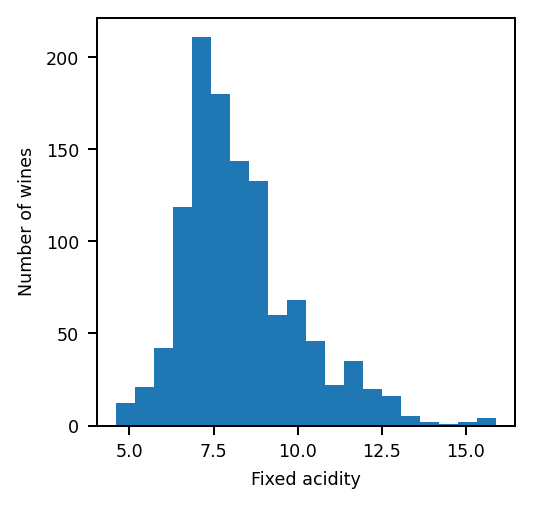

In [5]:
# Histogram of the fixed acidity column
plt.hist(data['fixed acidity'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Fixed acidity', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

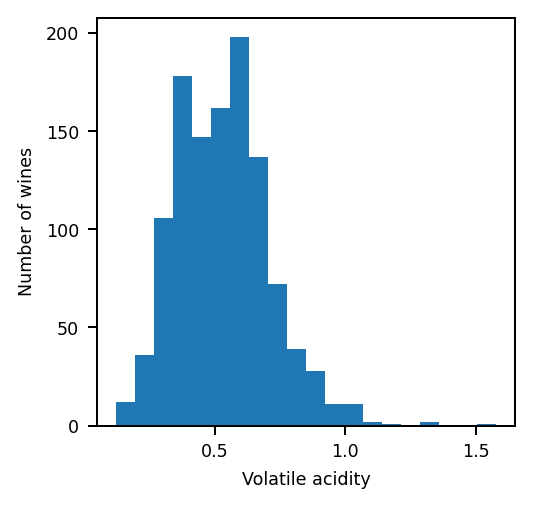

In [6]:
# Histogram of the volatile acidity column
plt.hist(data['volatile acidity'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Volatile acidity', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

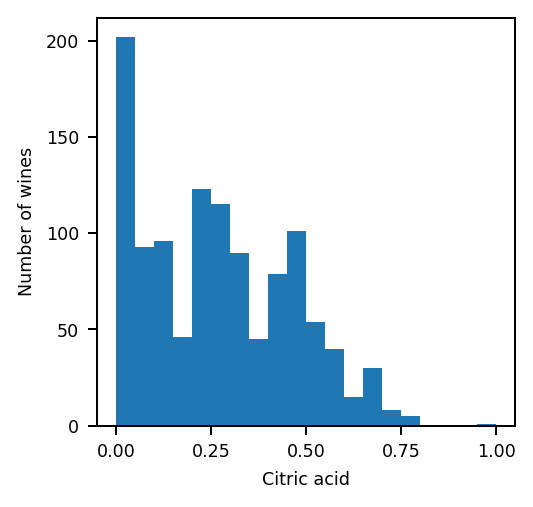

In [7]:
# Histogram of the citric acid column
plt.hist(data['citric acid'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Citric acid', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

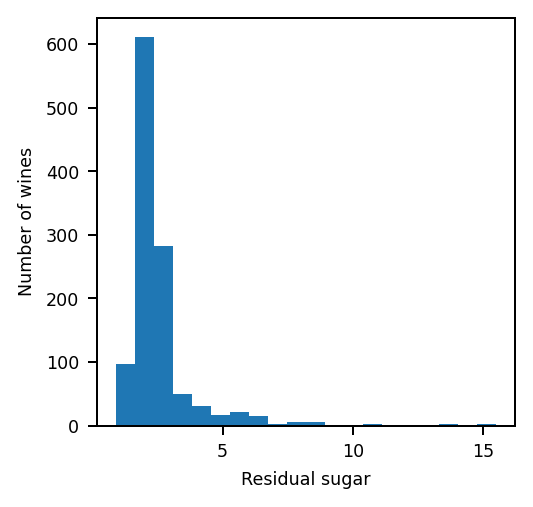

In [8]:
# Histogram of the residual sugar column
plt.hist(data['residual sugar'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Residual sugar', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

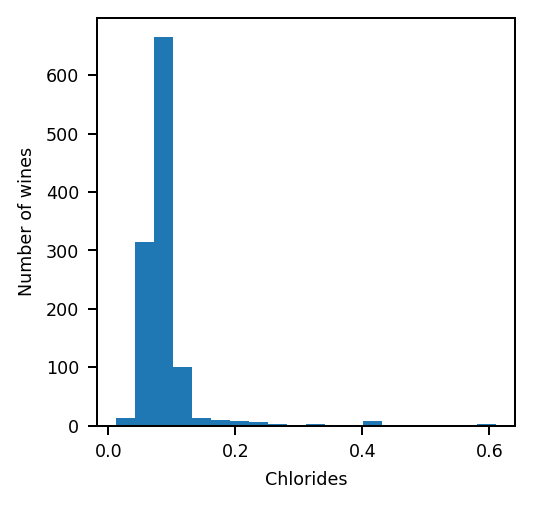

In [9]:
# Histogram of the chlorides column
plt.hist(data['chlorides'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Chlorides', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

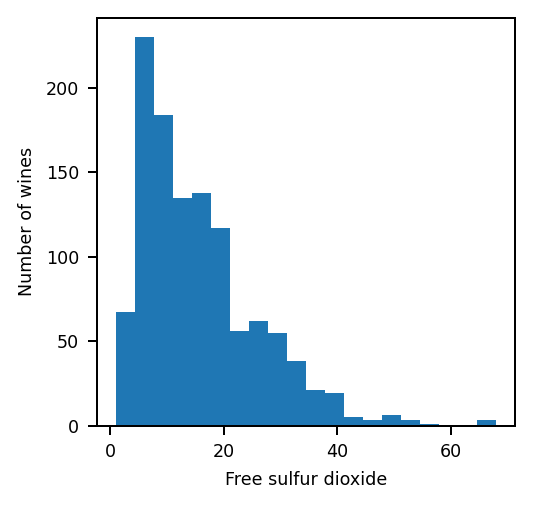

In [10]:
# Histogram of the free sulfur dioxide column
plt.hist(data['free sulfur dioxide'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Free sulfur dioxide', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

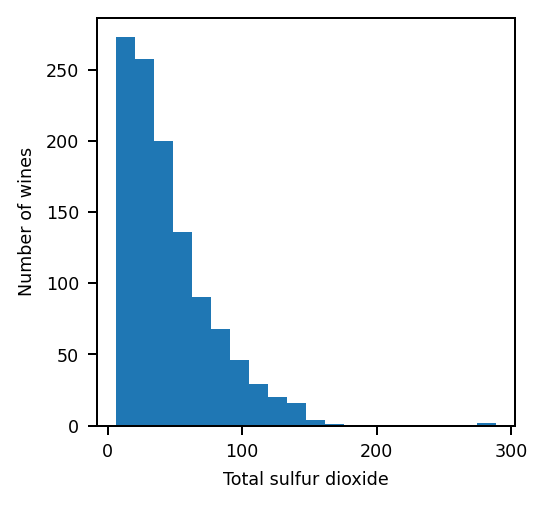

In [11]:
# Histogram of the total sulfur dioxide column
plt.hist(data['total sulfur dioxide'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Total sulfur dioxide', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

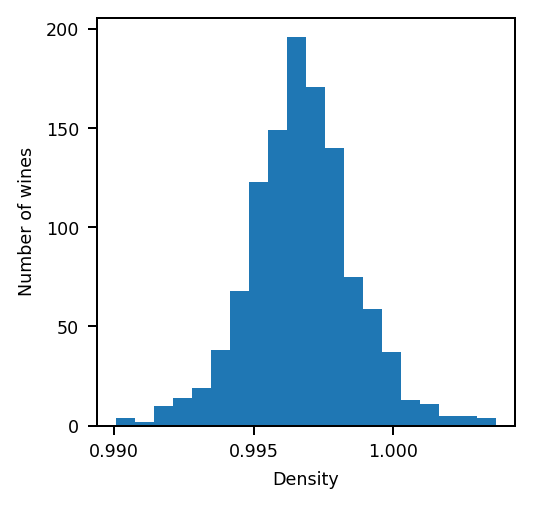

In [12]:
# Histogram of the density column
plt.hist(data['density'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Density', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

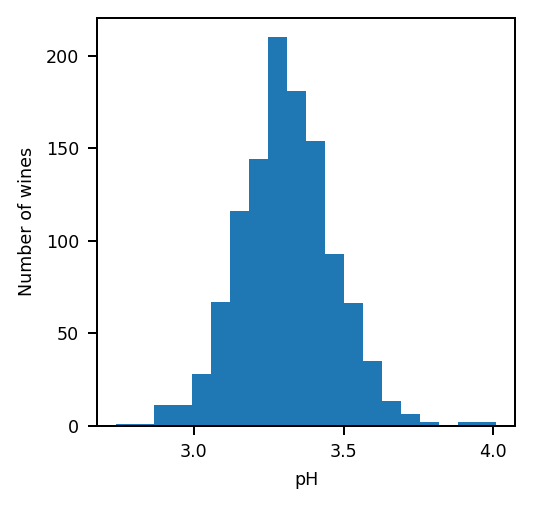

In [13]:
# Histogram of the pH column
plt.hist(data['pH'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('pH', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

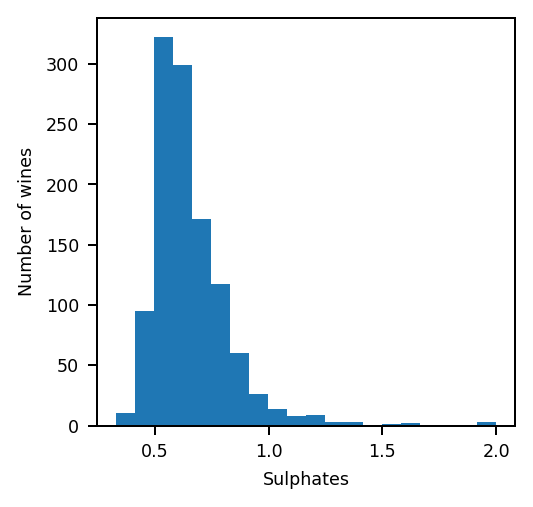

In [14]:
# Histogram of the sulphates column
plt.hist(data['sulphates'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Sulphates', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

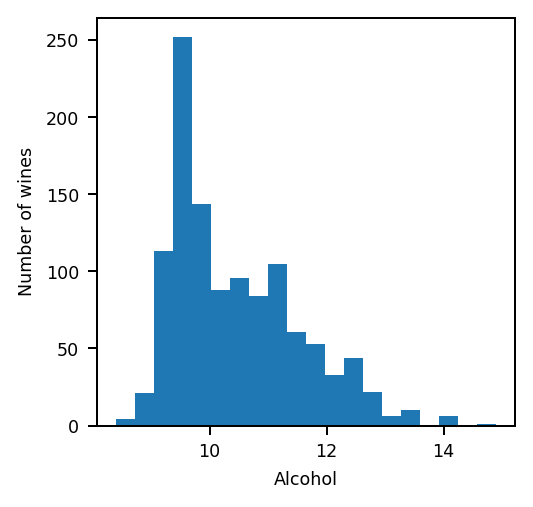

In [15]:
# Histogram of the alcohol column
plt.hist(data['alcohol'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Alcohol', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

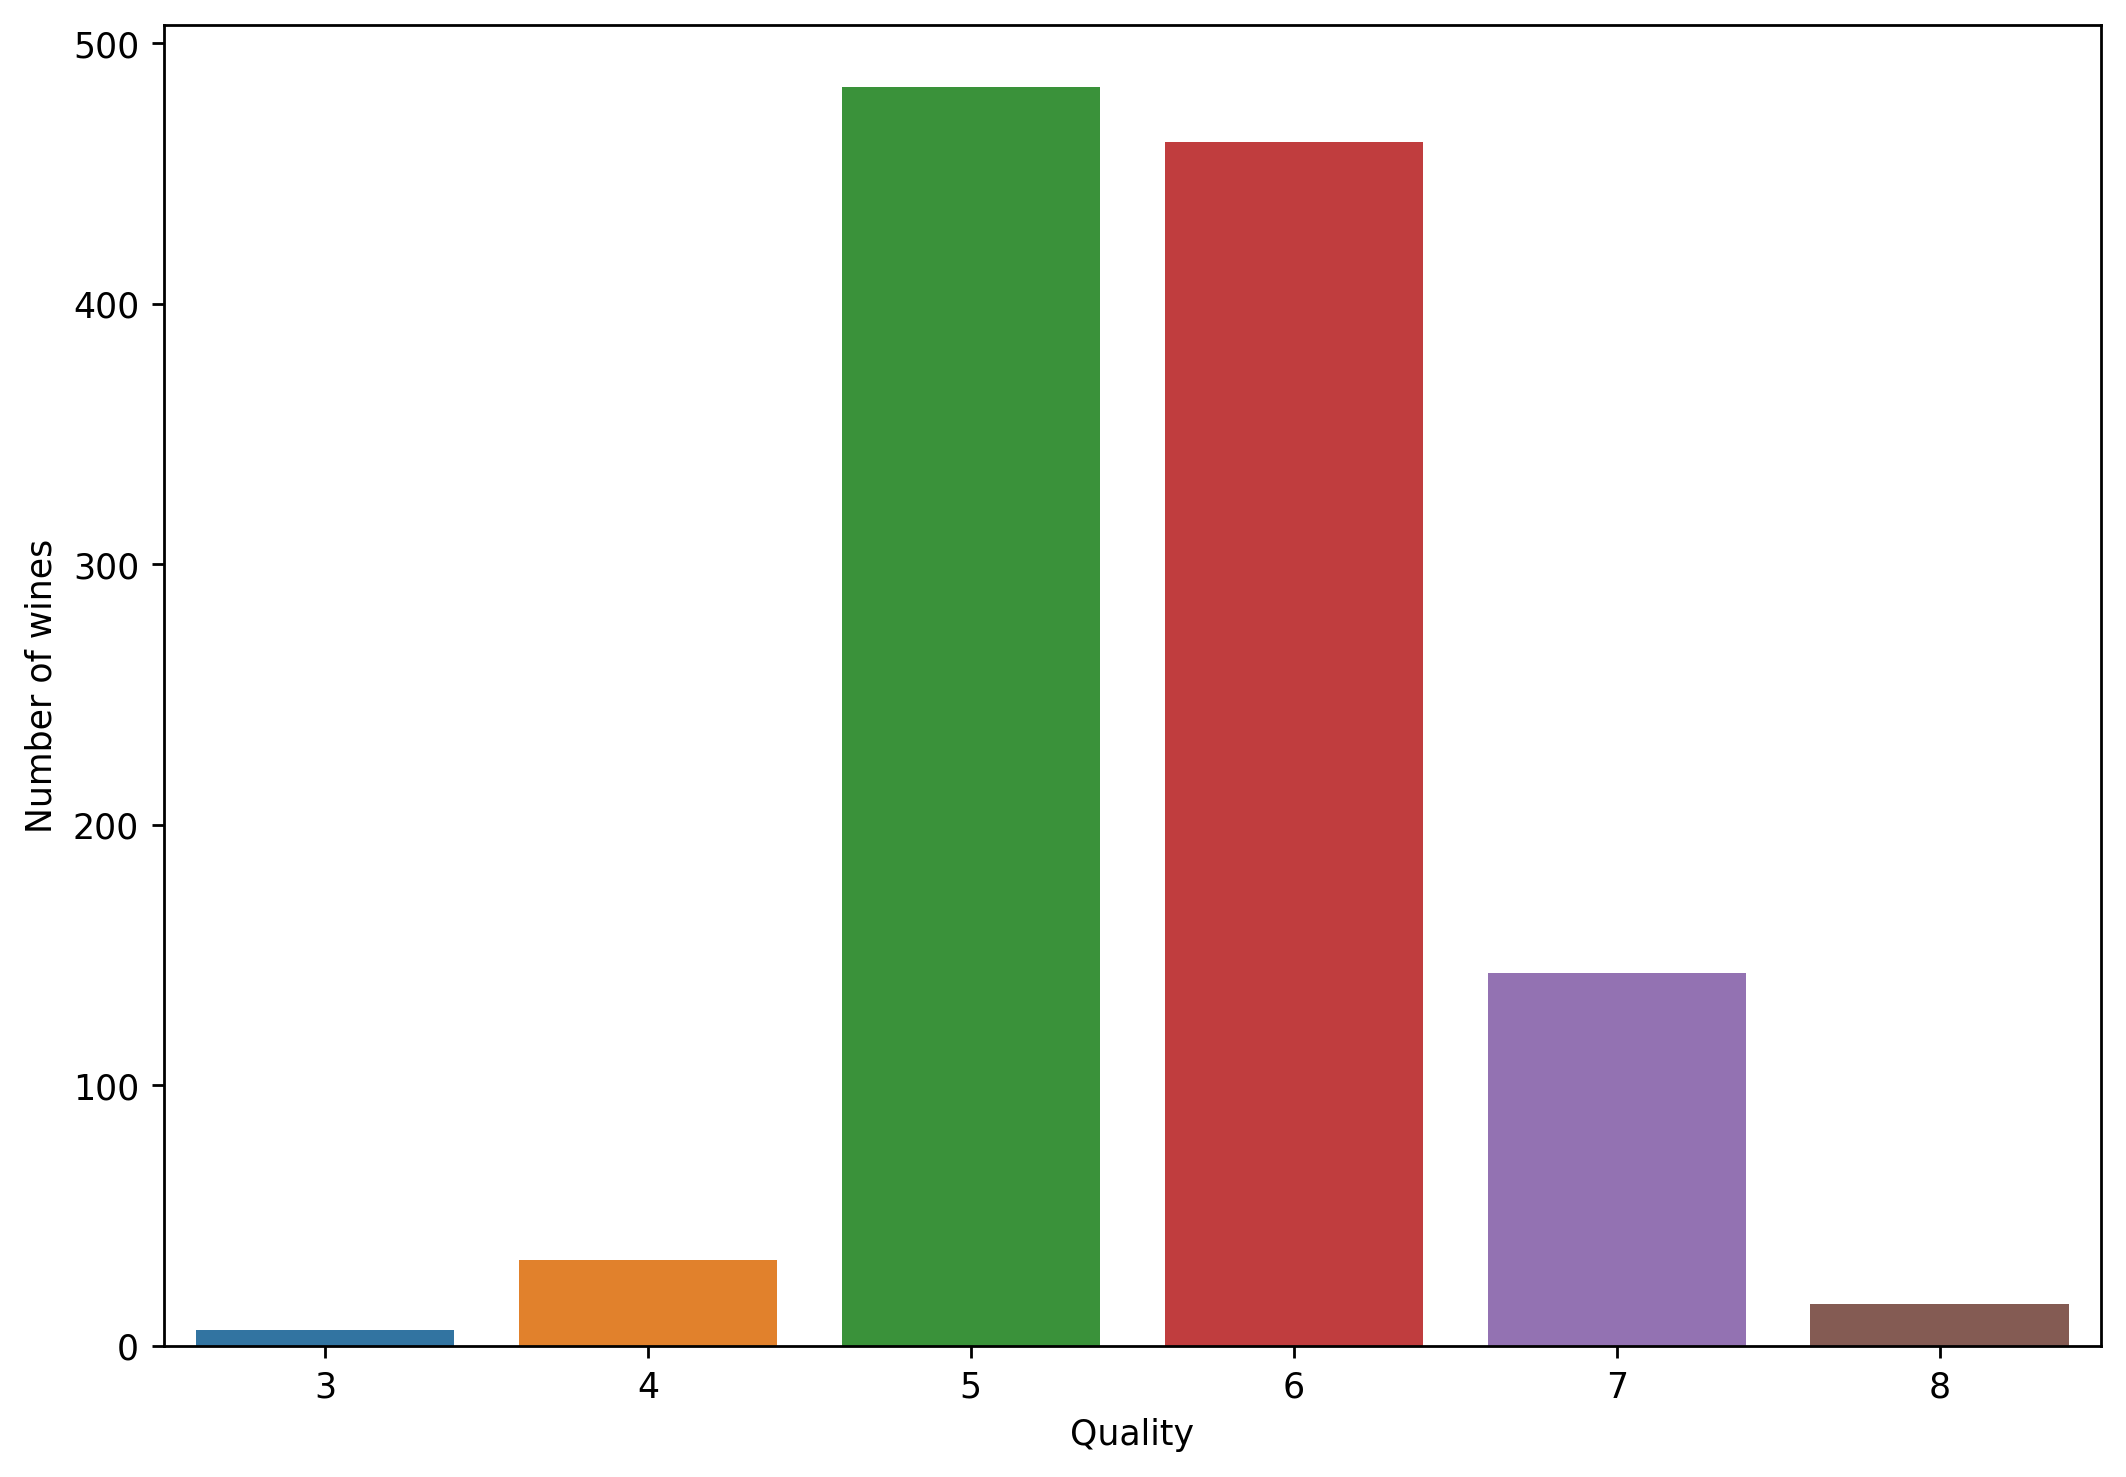

In [16]:
# Counterplot of the quality column
sns.countplot(x='quality', data=data, figure=plt.figure(figsize=(10,7), dpi=250))
plt.xlabel('Quality')
plt.ylabel('Number of wines')
plt.show()

We have to note that the classes are highly imbalanced. We will address that issue later. Now, let us compute the correlation between each feature. What we have to get is that all pairs of inputs must be uncorrelated, and each pair (input, output) must be highly correlated.

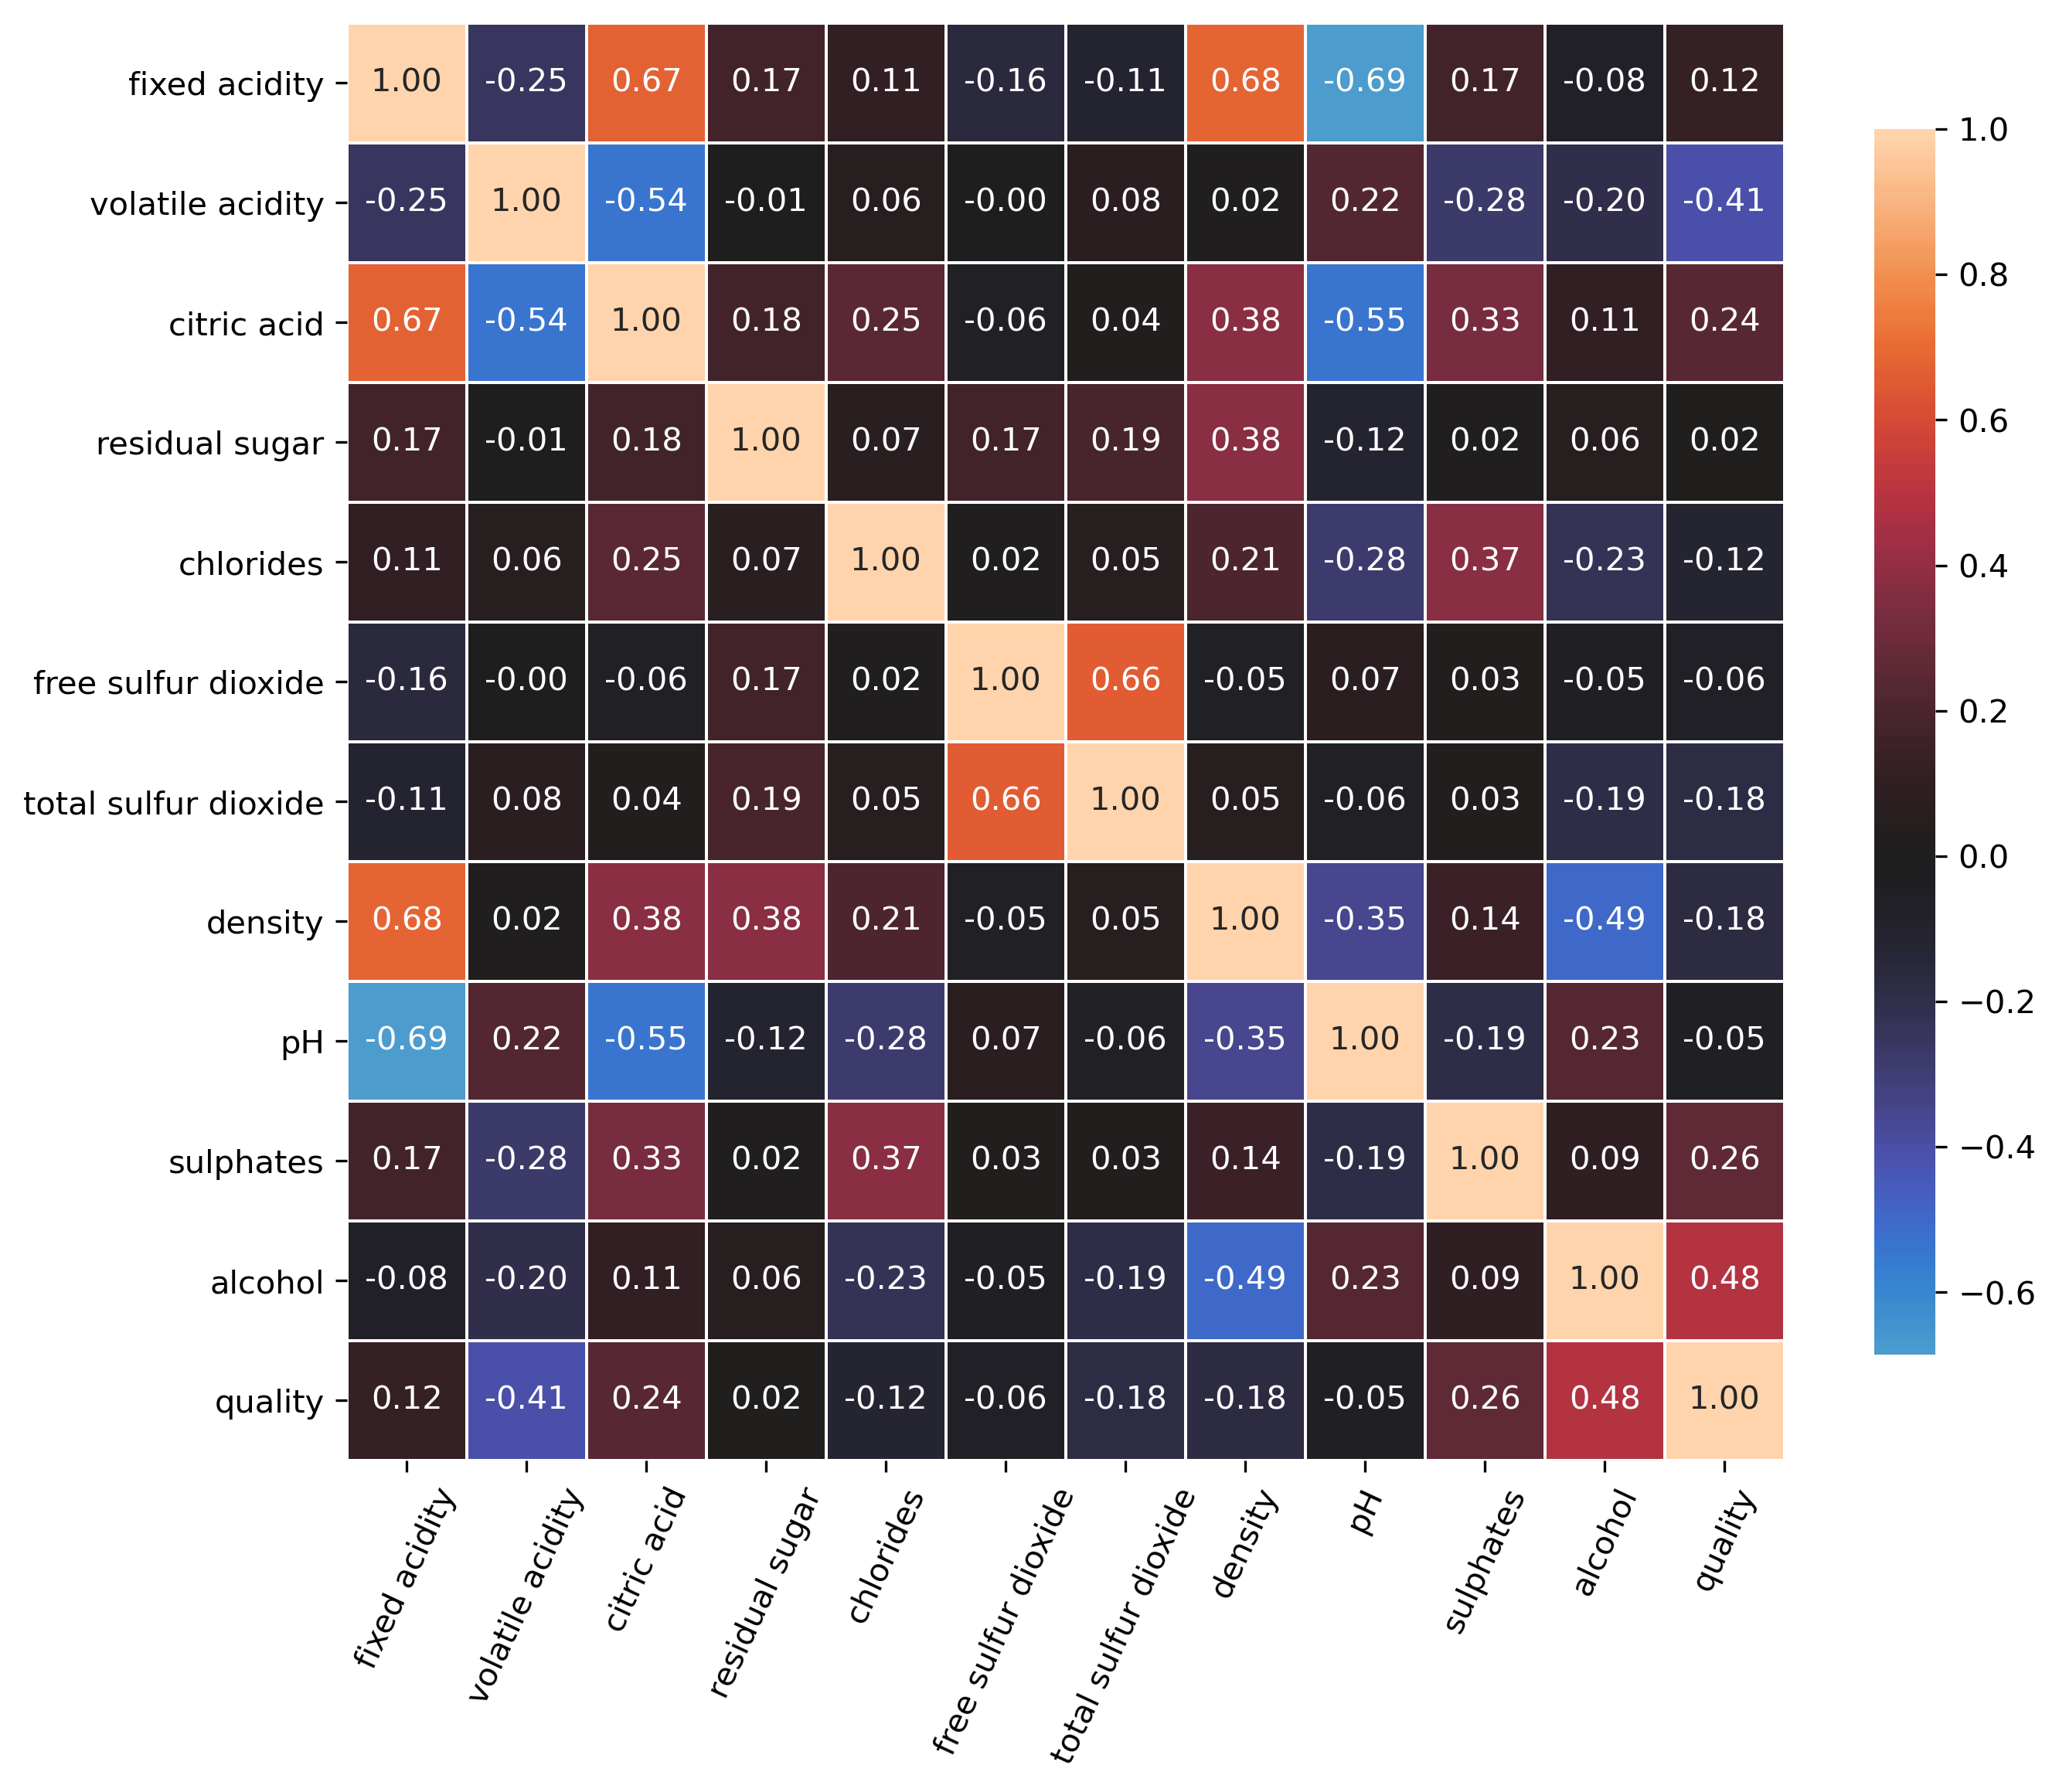

In [17]:
fig, ax = plt.subplots(figsize=(10,10), dpi=300)
sns.heatmap(data.drop(["Id"], axis=1).corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, figure=fig)
plt.xticks(rotation=65)
plt.show()

We can see that there are some features that are correlated to each other. For example, the fixed acidity is highly correlated with de pH and the density of the wine. To better understand the correlation between features, let us make some pairplots.

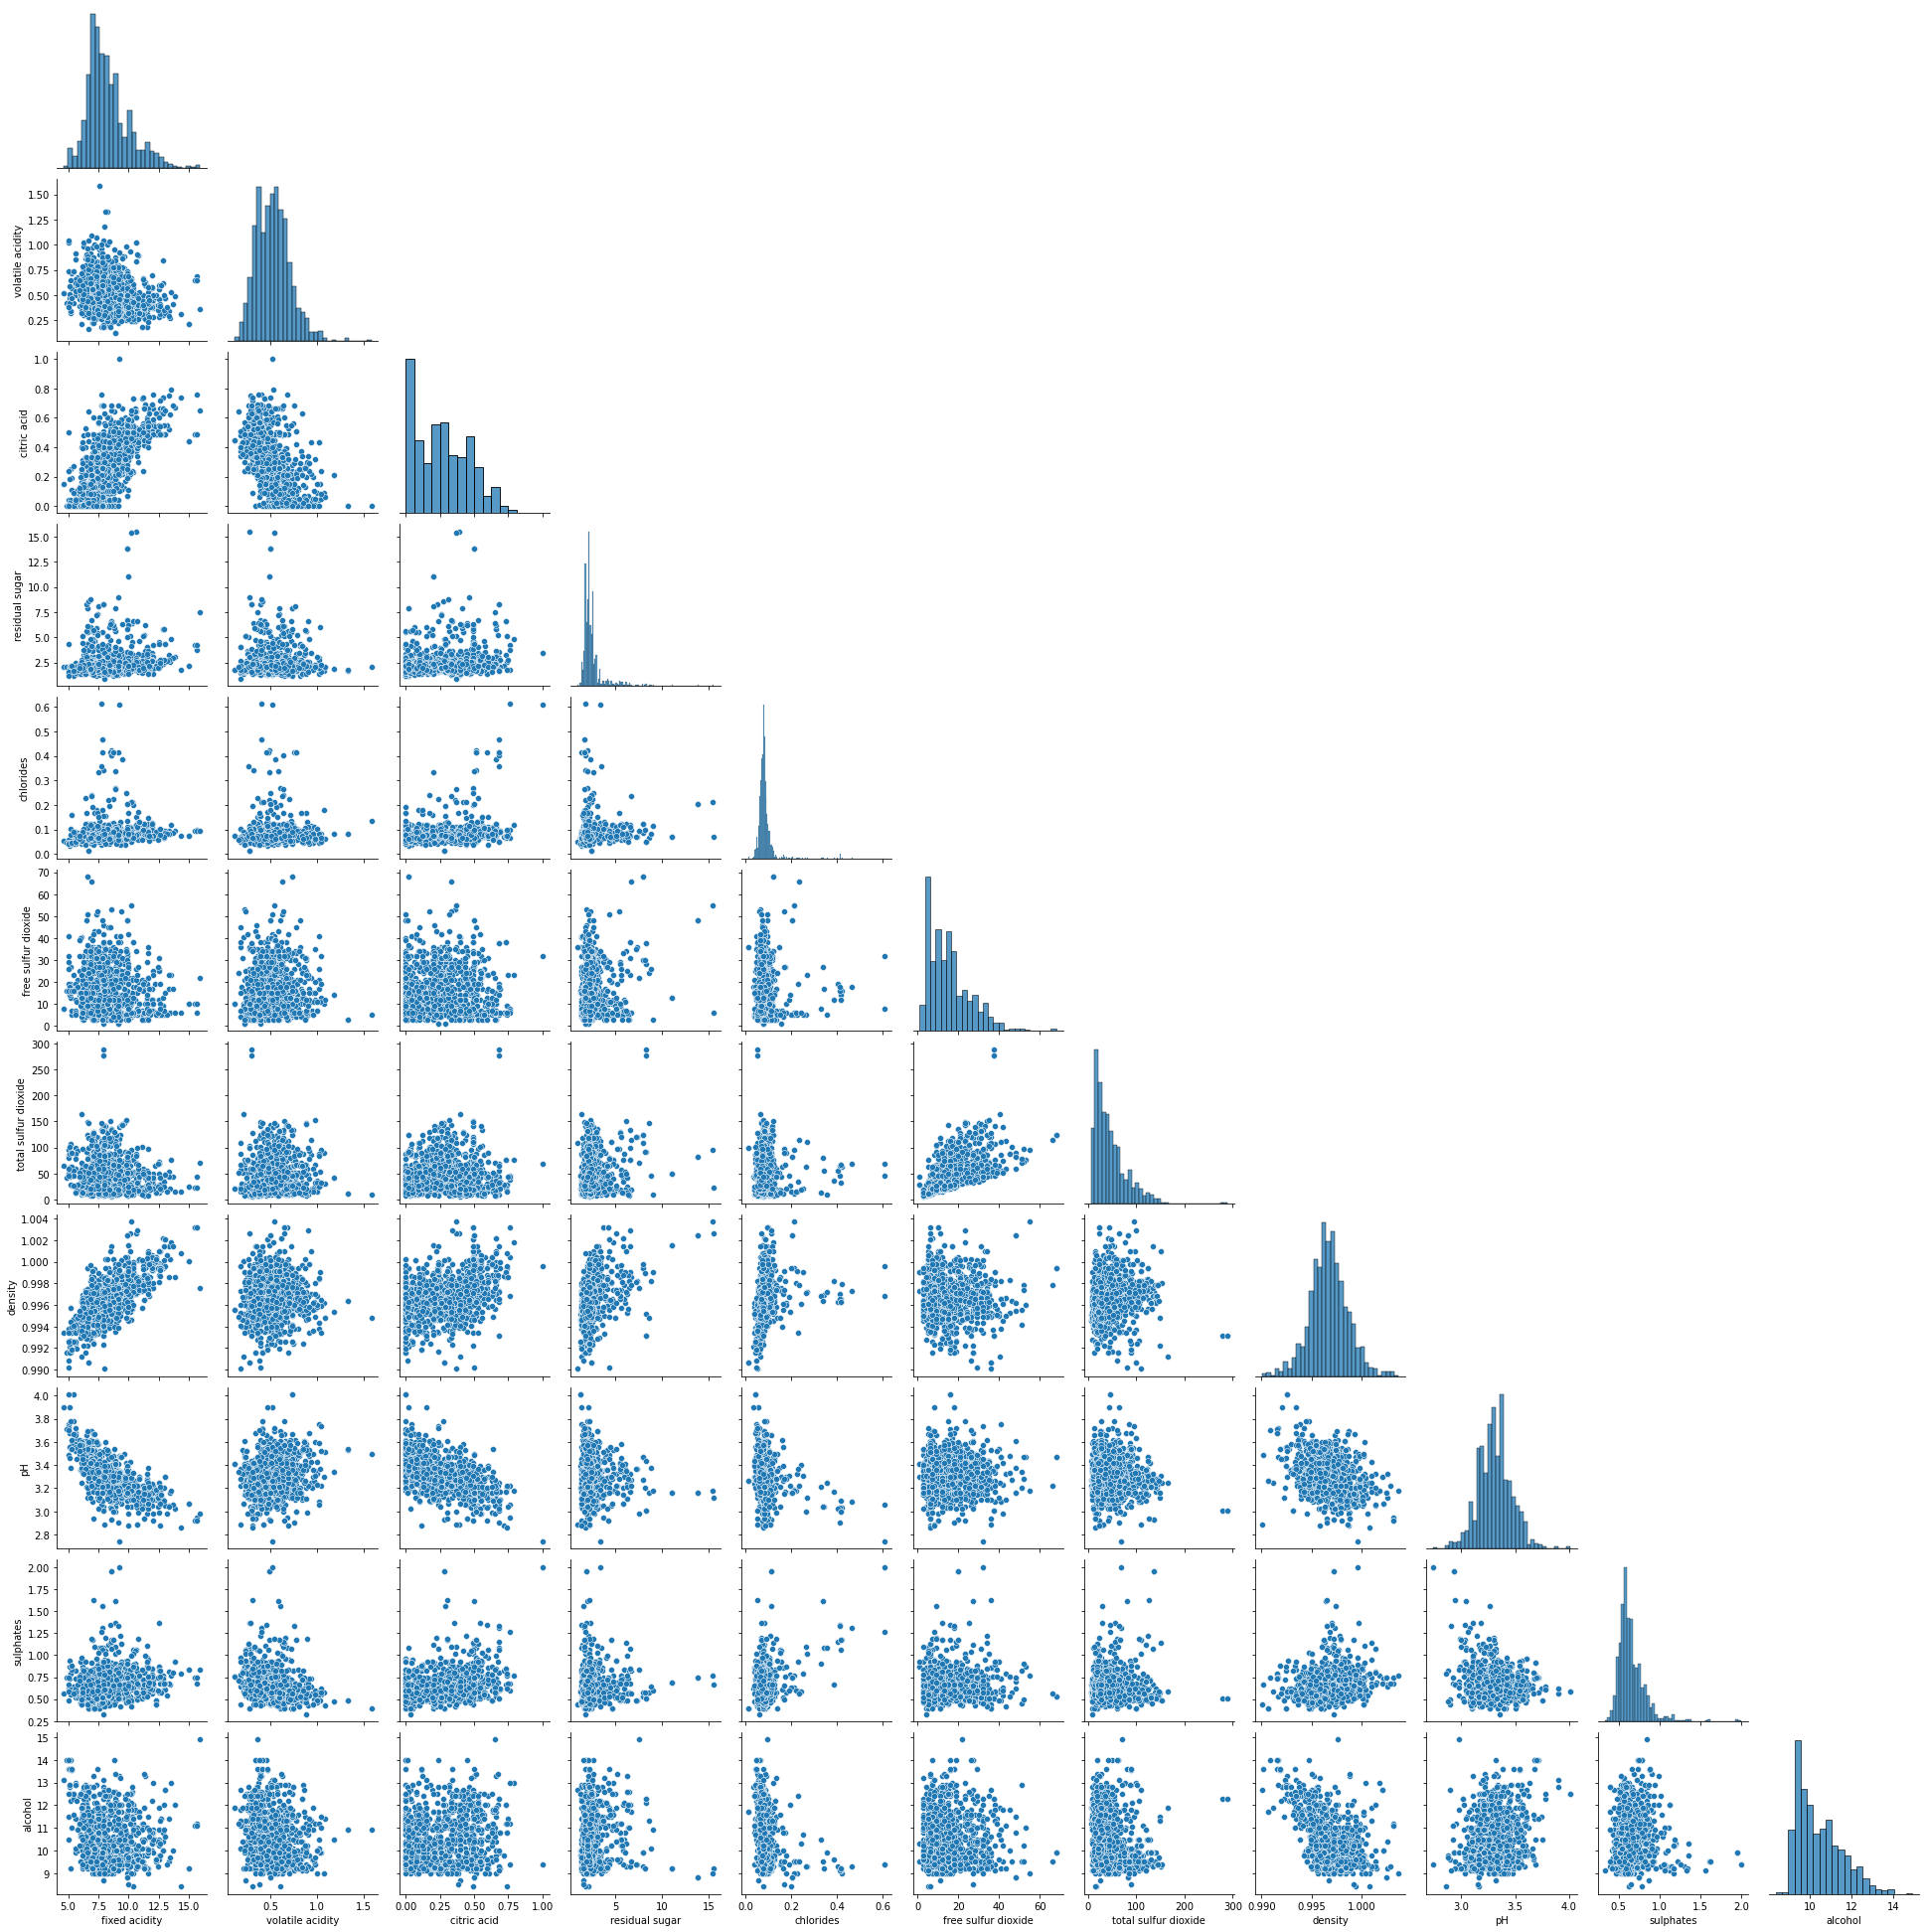

In [18]:
sns.pairplot(data.drop(["Id", "quality"], axis=1), corner=True)

To correct the problem of correlated variables we have to make use of the Principal Component Analysis (PCA) method. We will apply this technique to the features of the dataset.

In [19]:
# Let us standardize the input data using a hand-made function
def stan(column):
    return (column - column.mean())/column.std()

data_std = data

for col in data.columns[:11]:
    data_std[col] = stan(data[col])

Now we can check out the transformed data before continue with the PCA method.

In [20]:
data_std.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1143.000000,1143.000000
mean,-2.885609e-15,1.710210e-15,4.922377e-15,2.148957e-15,6.055426e-15,-1.245237e-16,3.760965e-16,-3.461030e-13,-1.182645e-14,7.819156e-18,1.357585e-14,5.657043,804.969379
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.805824,463.997116
min,-2.123553e+00,-2.289881e+00,-1.364429e+00,-1.203725e+00,-1.585294e+00,-1.425833e+00,-1.217575e+00,-3.459833e+00,-3.644836e+00,-1.923182e+00,-1.887008e+00,3.000000,0.000000
25%,-6.930159e-01,-7.729005e-01,-9.068469e-01,-4.662173e-01,-3.582312e-01,-8.404953e-01,-7.600085e-01,-6.027900e-01,-6.767019e-01,-6.320927e-01,-8.705556e-01,5.000000,411.000000
50%,-2.352439e-01,-6.312075e-02,-9.336693e-02,-2.449649e-01,-1.678248e-01,-2.551572e-01,-2.719377e-01,-2.618672e-02,-6.478021e-03,-2.212915e-01,-2.237224e-01,6.000000,794.000000
75%,4.514140e-01,6.049072e-01,7.709555e-01,5.003827e-02,6.489400e-02,5.252936e-01,4.601684e-01,5.789870e-01,5.679996e-01,4.242533e-01,6.079202e-01,6.000000,1209.500000
max,4.342476e+00,5.837793e+00,3.719820e+00,9.563892e+00,1.108730e+01,5.110442e+00,7.415177e+00,3.615245e+00,4.461681e+00,7.877361e+00,4.119300e+00,8.000000,1597.000000


We can see that the data was correctly standardized since their means are almost 0 and their standard deviation are 1. Now we can do the PCA transformation.

In [21]:
# Now we have to compute the covariance matrix to this new data
cov = np.cov(data_std.drop(["quality", "Id"], axis=1), rowvar=False)

# Once we have the covariance matrix we need to calculate its eigenvectors (v) and eigenvalues (w)
w, v = np.linalg.eig(cov)

# We sort the columns of the eigenvector matrix and of the eigenvalue matrix by decreasing eigenvalues
idx = np.argsort(-1.0*w, axis=0)
w = w[idx]
v = v[:,idx]
cec = []

# We compute the cumulative energy content for each eigenvector
for j in range(len(w)):
    cec.append(np.sum(w[:j+1], axis=0))

cec = np.array(cec)

# We have to choose a subset of eigenvectors as basis vectors. Let us find the Lth component of cec such that cec[L]/cec[-1] > 0.9
L = np.argwhere(cec/cec[-1] > 0.9)[0]

# We chose a subset of eigenvectors as basis vectors
basis = v[:,:L[0]+1]

# We project the data onto the new basis
trasnformed_data = np.matmul(data_std.drop(["Id", "quality"], axis=1), basis)

Now we have transformed the data let us see the degree of correlation between each new features.

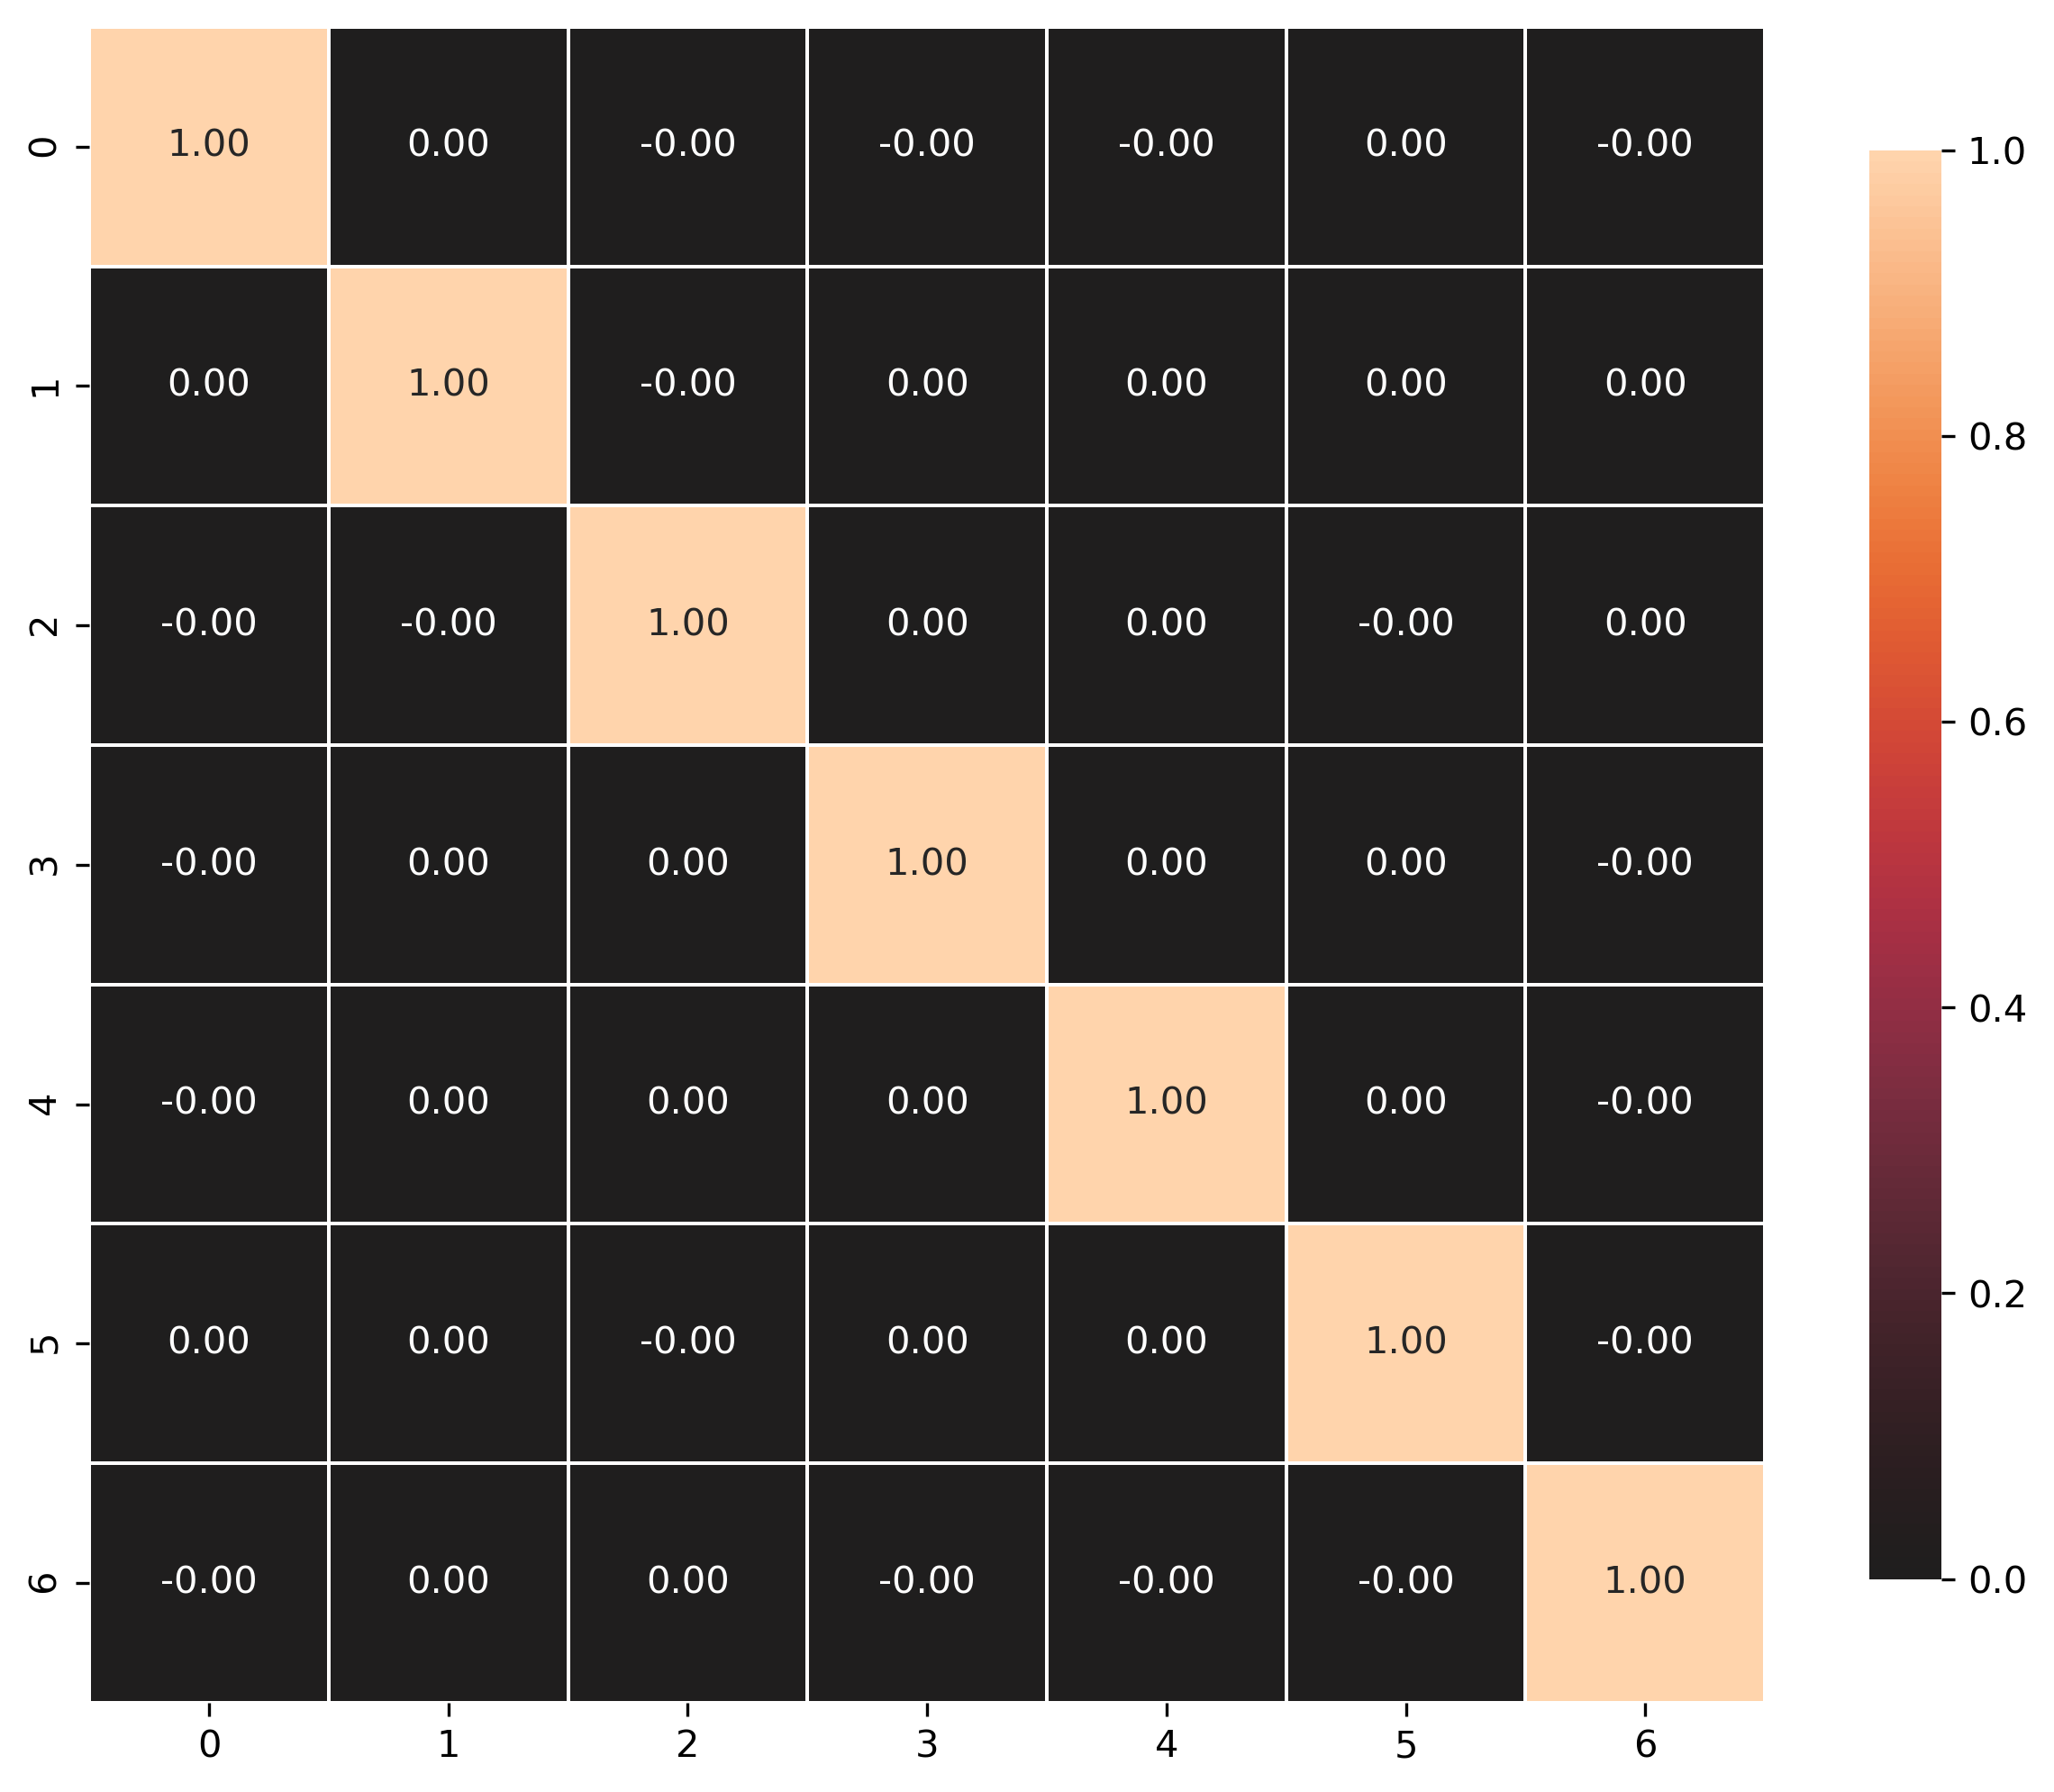

In [22]:
fig, ax = plt.subplots(figsize=(10,10), dpi=300)
sns.heatmap(trasnformed_data.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, figure=fig)
plt.show()

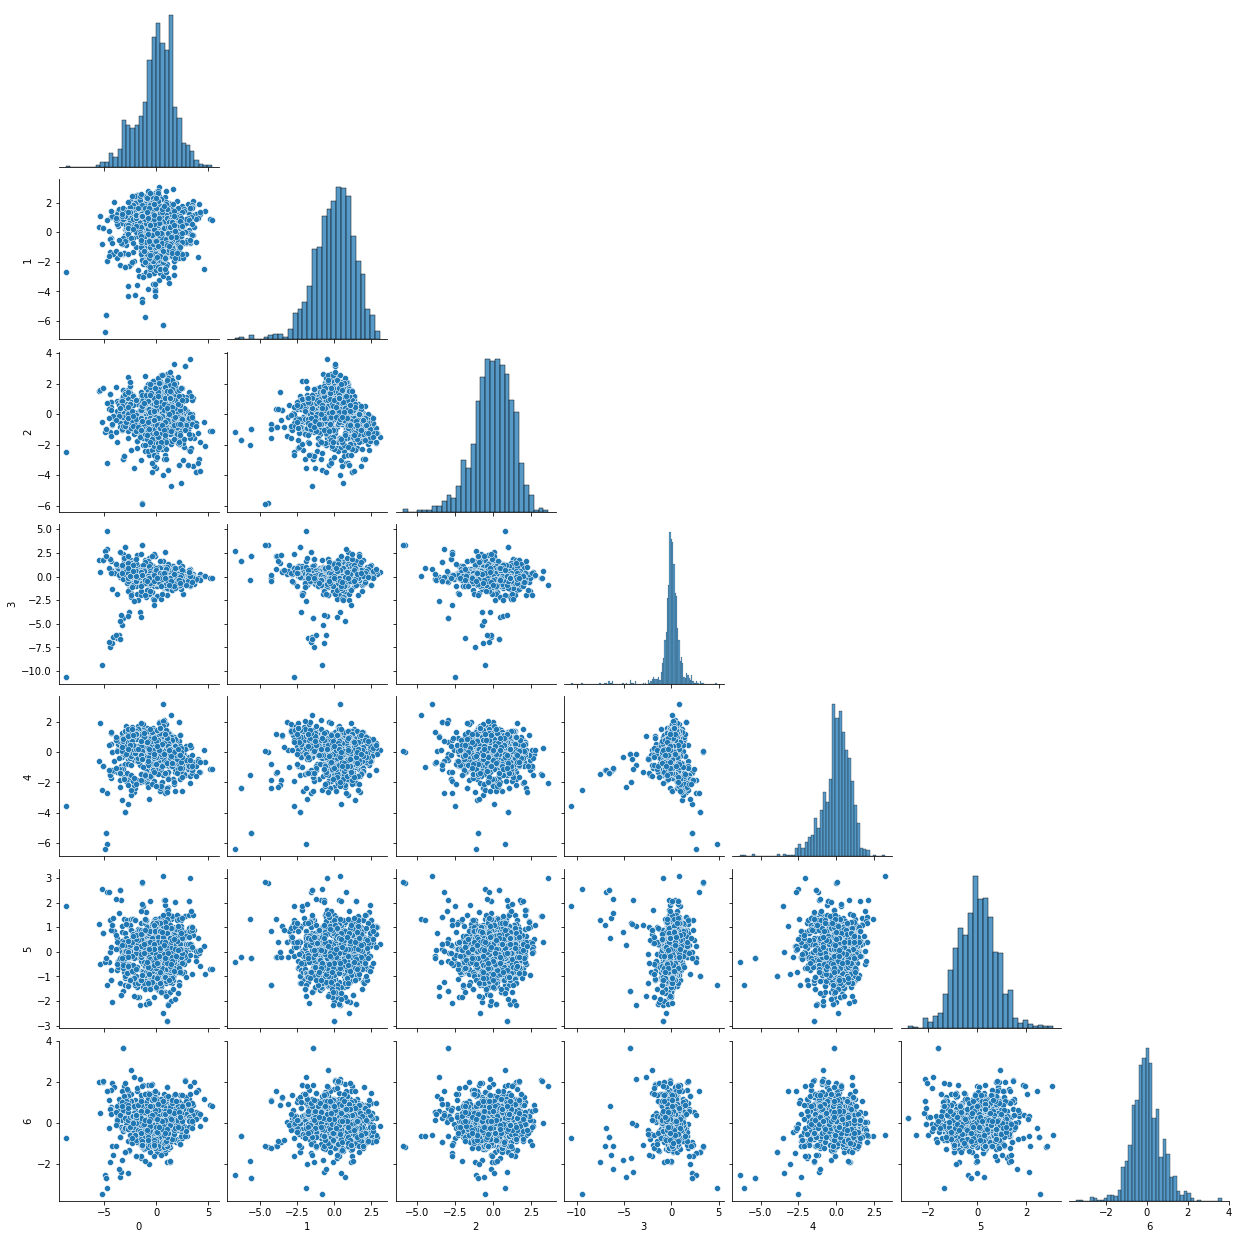

In [23]:
sns.pairplot(trasnformed_data, corner=True)

As we can see above, the correlation between features is now 0 between each one. Also, we can notice that now there are just 7 features instead of 11. Let us see, now, the correlation between these new variables and the quality column.

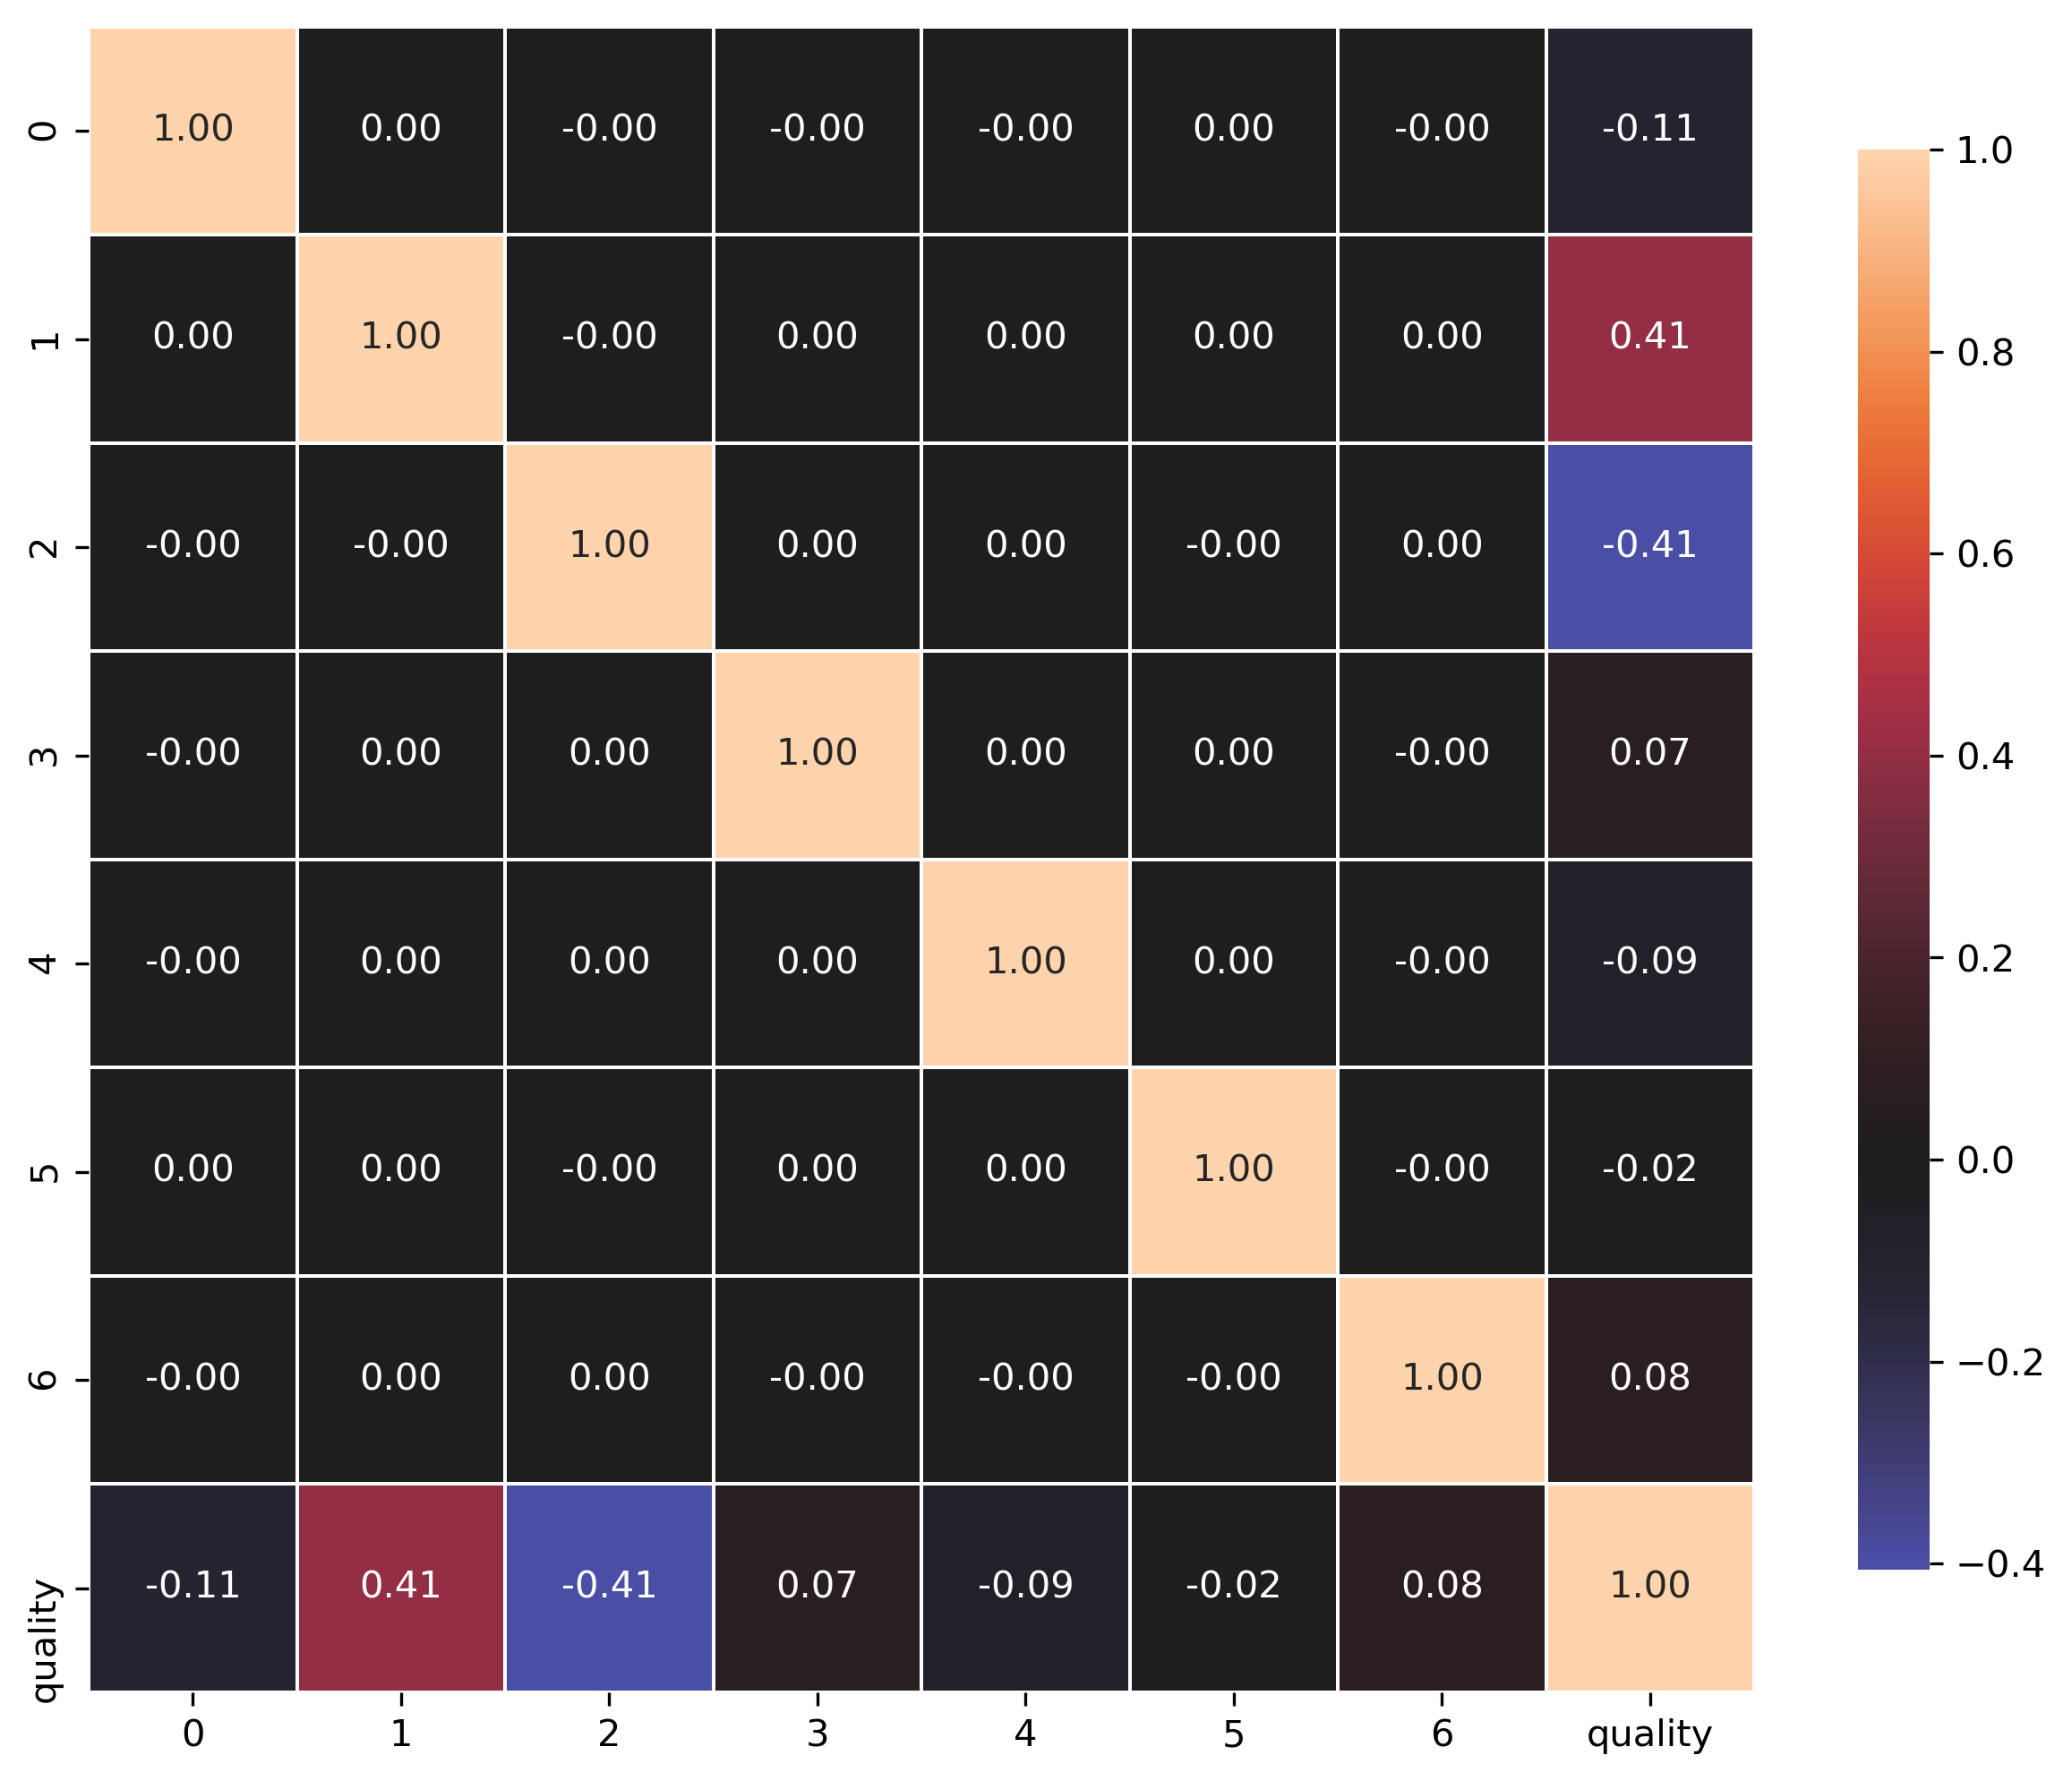

In [24]:
# Let us concatenate transformed_data with the quality column
data_conc = pd.concat((trasnformed_data, data["quality"]), axis=1)

fig, ax = plt.subplots(figsize=(10,10), dpi=300)
sns.heatmap(data_conc.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, figure=fig)
plt.show()

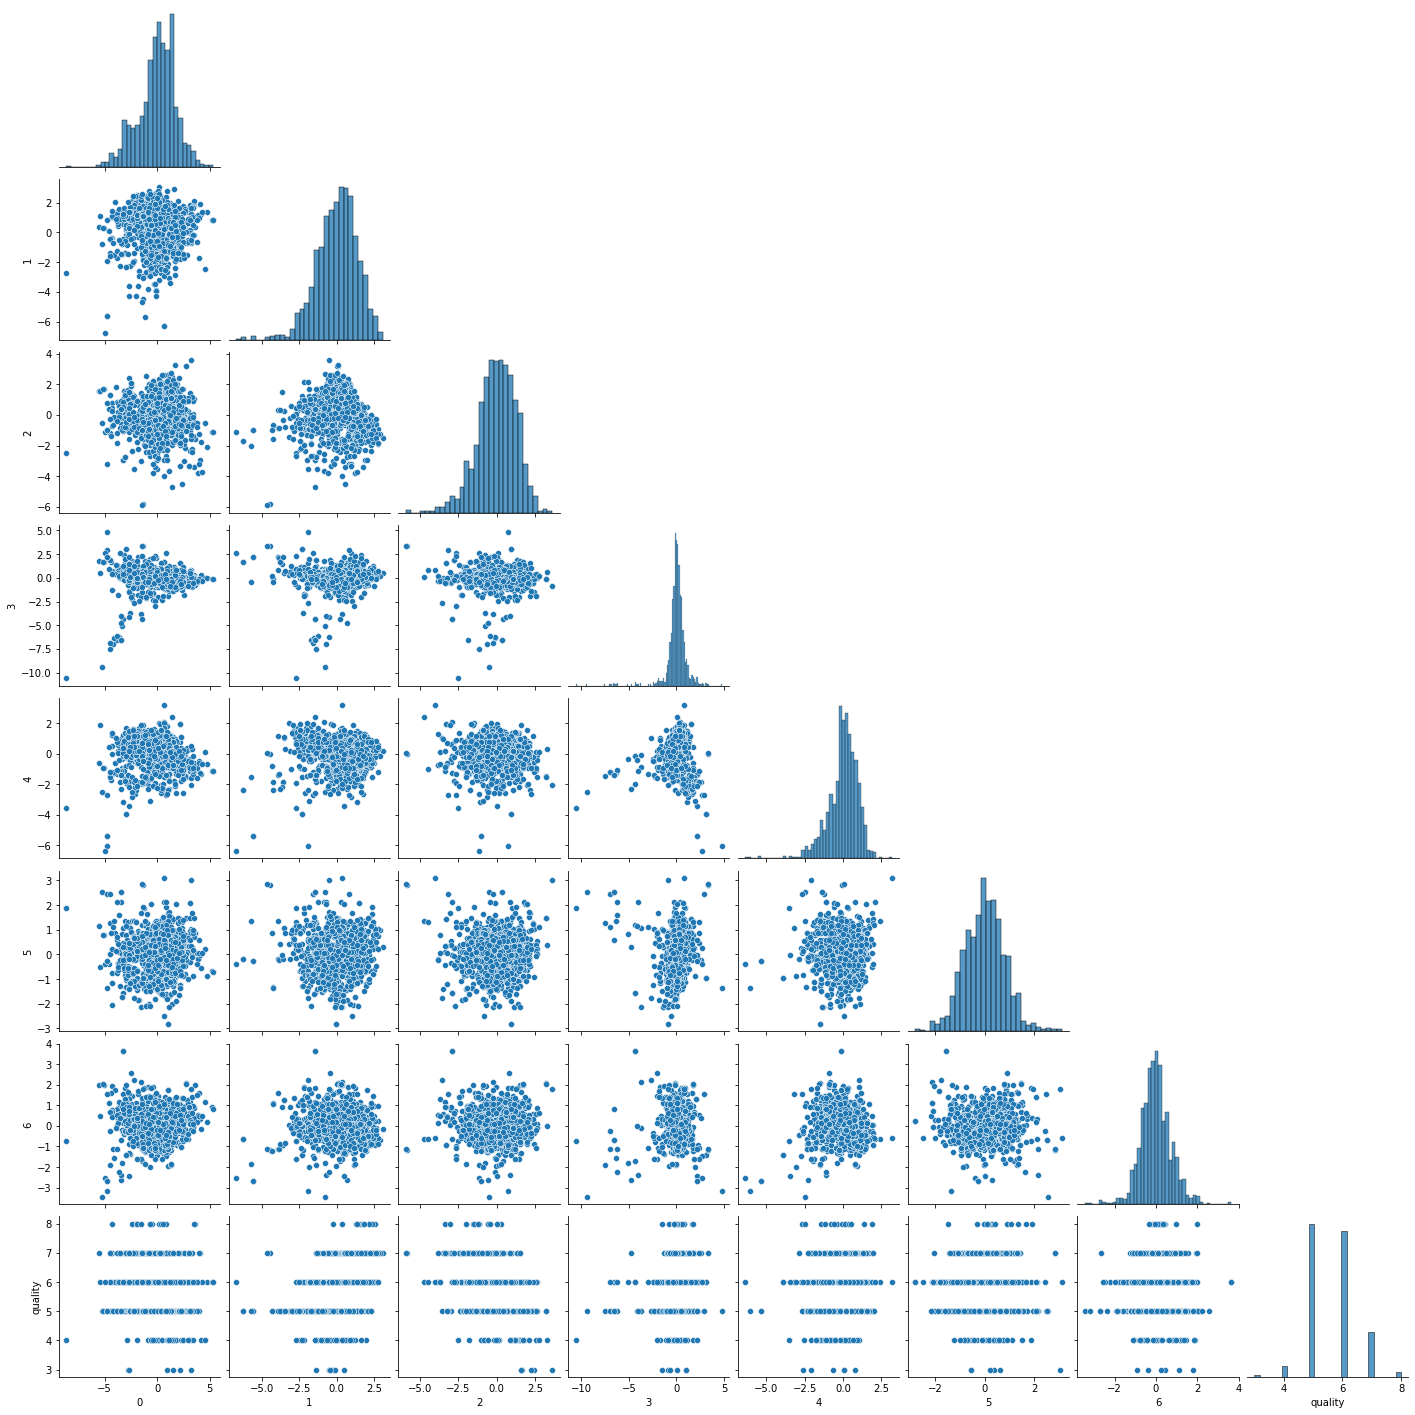

In [25]:
sns.pairplot(data_conc, corner=True)

We can see a little correlation between the features and the output. Just to finish to understand the new data let us get some information about it.

In [26]:
# Let us get a description about the transformed data
trasnformed_data.describe()

,0,1,2,3,4,5,6
count,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03
mean,1.331390e-13,7.850200e-14,-1.221258e-13,-5.829040e-14,4.768068e-14,1.528151e-13,-5.441326e-14
std,1.776558e+00,1.370497e+00,1.254453e+00,1.100684e+00,9.788838e-01,8.157016e-01,7.467244e-01
min,-8.665998e+00,-6.743622e+00,-5.908715e+00,-1.059444e+01,-6.374277e+00,-2.823386e+00,-3.444404e+00
25%,-9.391112e-01,-8.023978e-01,-7.561378e-01,-2.720578e-01,-4.248131e-01,-5.558045e-01,-4.567260e-01
50%,1.865538e-01,1.299471e-01,7.527427e-02,5.638919e-02,1.111624e-01,-5.561341e-03,-3.695319e-02
75%,1.260241e+00,9.395599e-01,9.158318e-01,4.351905e-01,6.455890e-01,5.403059e-01,4.380190e-01
max,5.316092e+00,3.081872e+00,3.614423e+00,4.797377e+00,3.194882e+00,3.095629e+00,3.651733e+00


In [27]:
# Let calculate the skewness of the features to see its asymmetry respect to its mean
trasnformed_data.skew()

0   -0.488473
1   -0.759403
2   -0.594072
3   -3.314570
4   -1.290528
5    0.102710
6    0.143769
dtype: float64

As we see above, the new data is completely uncorrelated, so we can proceed to the next step, to define a machine learning algorithm that can predict the column $quality$ of the original dataset. But before we do that, we must note from the count plot of the quality column that there are 6 classes of different wines. This little detail added to the fact that the dataset has ~1000 rows and that it is highly imbalanced, makes it difficult to train the model to predict 1 of the 6 classes given an input.

To solve this problem we can redefine the quality column, in the following way. We can make that the wines of quality 3, 4, and 5 are $\textit{bad}$ and the ones with quality 6, 7, and 8 are $\textit{good}$. That way, we further reduce the number of classes. Regarding the balancing of it, let us wait until we see the counterplot of the new data to analyse what we can do.

In [28]:
# Let us redefine the quality column
data_balanced = data_conc

# We change the values 3, 4, and 5 by 0
data_balanced['quality'].mask(data_balanced['quality'] <= 5, 0, inplace=True)

# We change the values 6, 7, and 8 by 1
data_balanced['quality'].mask(data_balanced['quality'] >= 6, 1, inplace=True)

Let us check the rate of $\textit{bad}$ and $\textit{good}$ values over the total of wines.

In [29]:
# Rate of bad wines
print('The {:.4f}% of the wines are bad. '.format(100*data_balanced['quality'].value_counts()[0]/data_balanced.shape[0]))

# Rate of good wines
print('The {:.4f}% of the wines are good. '.format(100*data_balanced['quality'].value_counts()[1]/data_balanced.shape[0]))

The 45.6693% of the wines are bad. 
The 54.3307% of the wines are good. 


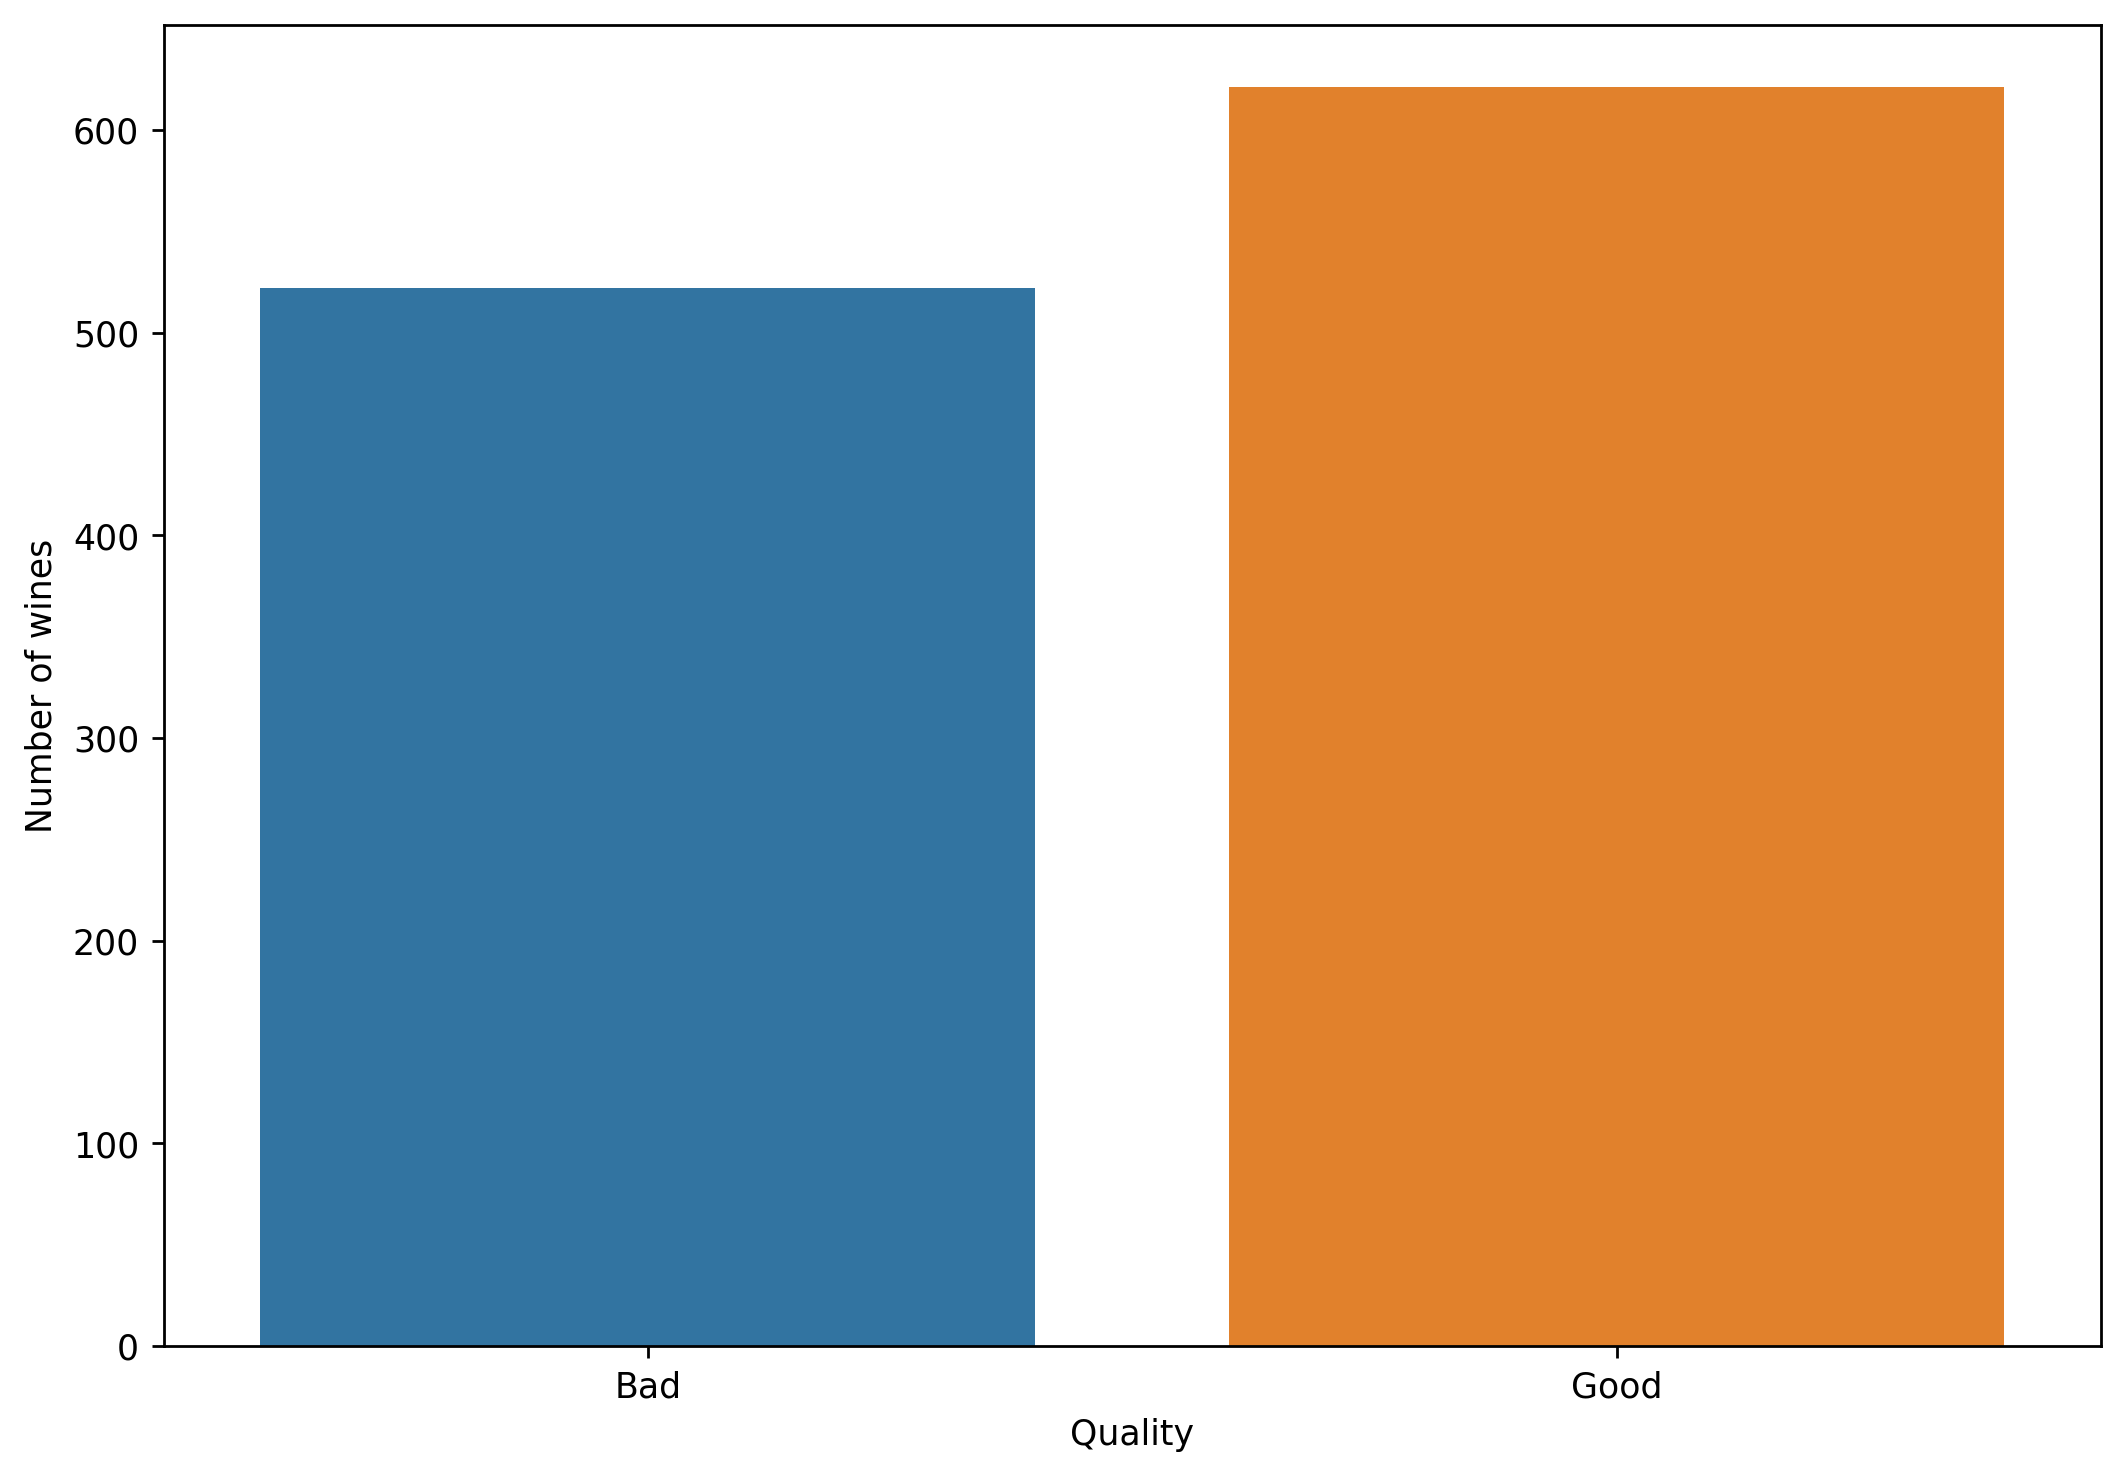

In [30]:
# Let us make a counterplot just to gain some visualization perspective on the new dataset
ax = sns.countplot(x='quality', data=data_balanced, figure=plt.figure(figsize=(10,7), dpi=250))
ax.set_xticklabels(['Bad', 'Good'])
plt.xlabel('Quality')
plt.ylabel('Number of wines')
plt.show()

Now we can see that the dataset is balanced. Also, since it has just two classes it is easier to train a model with data like this. Now, we can proceed to develop the machine learning algorithm.

In [31]:
# The inputs of the model will be X
X = data_balanced.drop(["quality"], axis=1)

# The targets of the model will be Y
Y = data_balanced["quality"]

In [32]:
# Let us split the inputs and targets into train data and test data. 20% of the data consitutes the test data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

In [33]:
# Let us check the shapes of the new datasets
print('X_train.shape =', X_train.shape, 'X_test.shape =', X_test.shape, 'Y_train.shape =', Y_train.shape, 'Y_test.shape =', Y_test.shape)

X_train.shape = (914, 7) X_test.shape = (229, 7) Y_train.shape = (914,) Y_test.shape = (229,)


We will use a stacked classification algorithm in addition to a random forest classifier, a balanced random forest classifier, a gaussian naive bayes classifier and a K-neighbors classifier. These last four classifiers will be the stacked classifiers. As a metaclassifier we will choose a logistic regresion classifier. First at all, it is best if we get the best hyperparameters to train the models. So, let us do that.

In [34]:
# Let us instanciate the classifier objects
BRFC = BalancedRandomForestClassifier(n_jobs=-1)
RFC = RandomForestClassifier(n_jobs=-1)
KNC = KNeighborsClassifier(n_jobs=-1)

# We need to define the distributions of hyperparameters from where will be sampled
# Balanced random forest
B_distributions = dict(n_estimators = [k for k in range(1, 201)],
                     min_impurity_decrease = uniform(loc=0, scale=1),
                     max_depth = [2, 3, 4, 5, 6, 7],
                     min_samples_split = [k for k in range(1, 101)],
                     max_leaf_nodes = [k for k in range(1, 101)],
                     sampling_strategy = ['all', 'auto'])

# Random forest
distributions = dict(n_estimators = [k for k in range(1, 101)],
                     min_impurity_decrease = uniform(loc=0, scale=1),
                     max_leaf_nodes = [k for k in range(101)],
                     max_depth = [2, 3, 4, 5, 6, 7, 8, 9], 
                     min_samples_split = [k for k in range(1, 101)])

# K-Neighbors
K_distributions = dict(n_neighbors = [k for k in range(2, 51)],
                       weights = ['uniform', 'distance'],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'],
                       p = [k for k in range(1, 15)])

# Let us instanciate the random searchers of hyperparameters object
B_random_searcher = RandomizedSearchCV(BRFC, B_distributions, random_state=3)
random_searcher = RandomizedSearchCV(RFC, distributions, random_state=1)
K_random_searcher = RandomizedSearchCV(KNC, K_distributions, random_state=4)

# Let us search the best fit hyperparameters
B_search = B_random_searcher.fit(X_train, Y_train)
search = random_searcher.fit(X_train, Y_train)
K_search = K_random_searcher.fit(X_train, Y_train)

# The best fit hyperparameters are
print('B - Hyperparameters: ', B_search.best_params_)
print('===================')
print('Hyperparameters: ', search.best_params_)
print('===================')
print('K - Hyperparameters: ', K_search.best_params_)

B - Hyperparameters:  {'max_depth': 2, 'max_leaf_nodes': 21, 'min_impurity_decrease': 0.029876210878566956, 'min_samples_split': 40, 'n_estimators': 143, 'sampling_strategy': 'all'}
Hyperparameters:  {'max_depth': 7, 'max_leaf_nodes': 12, 'min_impurity_decrease': 0.9325573593386588, 'min_samples_split': 10, 'n_estimators': 76}
K - Hyperparameters:  {'weights': 'distance', 'p': 5, 'n_neighbors': 27, 'algorithm': 'auto'}


Now that we have the best fit hyperparameters, we can define the stacking classifier.

In [35]:
# Let us reinstanciate the classifier objects again, but this time with the best fit hyperparameters
BRFC = BalancedRandomForestClassifier(max_depth = B_search.best_params_['max_depth'], 
                                      min_impurity_decrease = B_search.best_params_['min_impurity_decrease'],
                                      n_estimators = B_search.best_params_['n_estimators'],
                                      max_leaf_nodes = B_search.best_params_['max_leaf_nodes'],
                                      min_samples_split = B_search.best_params_['min_samples_split'],
                                      sampling_strategy = B_search.best_params_['sampling_strategy'],
                                      n_jobs = -1,
                                      random_state = 10)

RFC = RandomForestClassifier(max_depth = search.best_params_['max_depth'], 
                             min_impurity_decrease = search.best_params_['min_impurity_decrease'],
                             n_estimators = search.best_params_['n_estimators'],
                             max_leaf_nodes = search.best_params_['max_leaf_nodes'],
                             min_samples_split = search.best_params_['min_samples_split'],
                             n_jobs = -1,
                             random_state = 11)

KNC = KNeighborsClassifier(n_neighbors = K_search.best_params_['n_neighbors'],
                           weights = K_search.best_params_['weights'],
                           algorithm = K_search.best_params_['algorithm'],
                           p = K_search.best_params_['p'],
                           n_jobs=-1)

GNBC = GaussianNB()
LR = LogisticRegression()
SCLF = StackingCVClassifier(classifiers=[BRFC, RFC, KNC, GNBC], 
                          shuffle = False, 
                          use_probas = False, 
                          meta_classifier = LR, 
                          cv = 3)

# It is better if we put all the classifiers in a dictionary
classifiers = {"BRFC": BRFC, "RFC": RFC, "KNC": KNC, "GNBC": GNBC, "SCLF": SCLF}

Now we have defined five classifiers, let us train and inspect them to see which one is the best option to use with this dataset.

In [36]:
# Let us train the models
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, Y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

Let us check the features importances for each of the classifiers that allows this calculation.

In [37]:
# Feature importances
print("B - Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), classifiers['BRFC'].feature_importances_), (data_balanced.drop(['quality'], axis=1)).columns), reverse=True))
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: x, classifiers['RFC'].feature_importances_), (data_balanced.drop(['quality'], axis=1)).columns), reverse=True))

B - Features sorted by their score:
[(0.4708, 1), (0.4343, 2), (0.0949, 4), (0.0, 6), (0.0, 5), (0.0, 3), (0.0, 0)]
Features sorted by their score:
[(0.0, 6), (0.0, 5), (0.0, 4), (0.0, 3), (0.0, 2), (0.0, 1), (0.0, 0)]


We have trained the models. Now it is time to make some predictions in order to evaluate the precision of them.

In [38]:
# Predictions dictionary
predictions = {"BRFC": None, "RFC": None, "KNC": None, "GNBC": None, "SCLF": None}

for key in classifiers:
    # Make prediction on test set
    predictions[key] = classifiers[key].predict(X_test)

Now, we need to check the predictions to choose the best model.

In [39]:
# Check the accuracy score
for key in predictions:
    print('{} - Accuracy score: '.format(key), accuracy_score(Y_test, predictions[key]))

BRFC - Accuracy score:  0.7729257641921398
RFC - Accuracy score:  0.5414847161572053
KNC - Accuracy score:  0.7991266375545851
GNBC - Accuracy score:  0.759825327510917
SCLF - Accuracy score:  0.7991266375545851


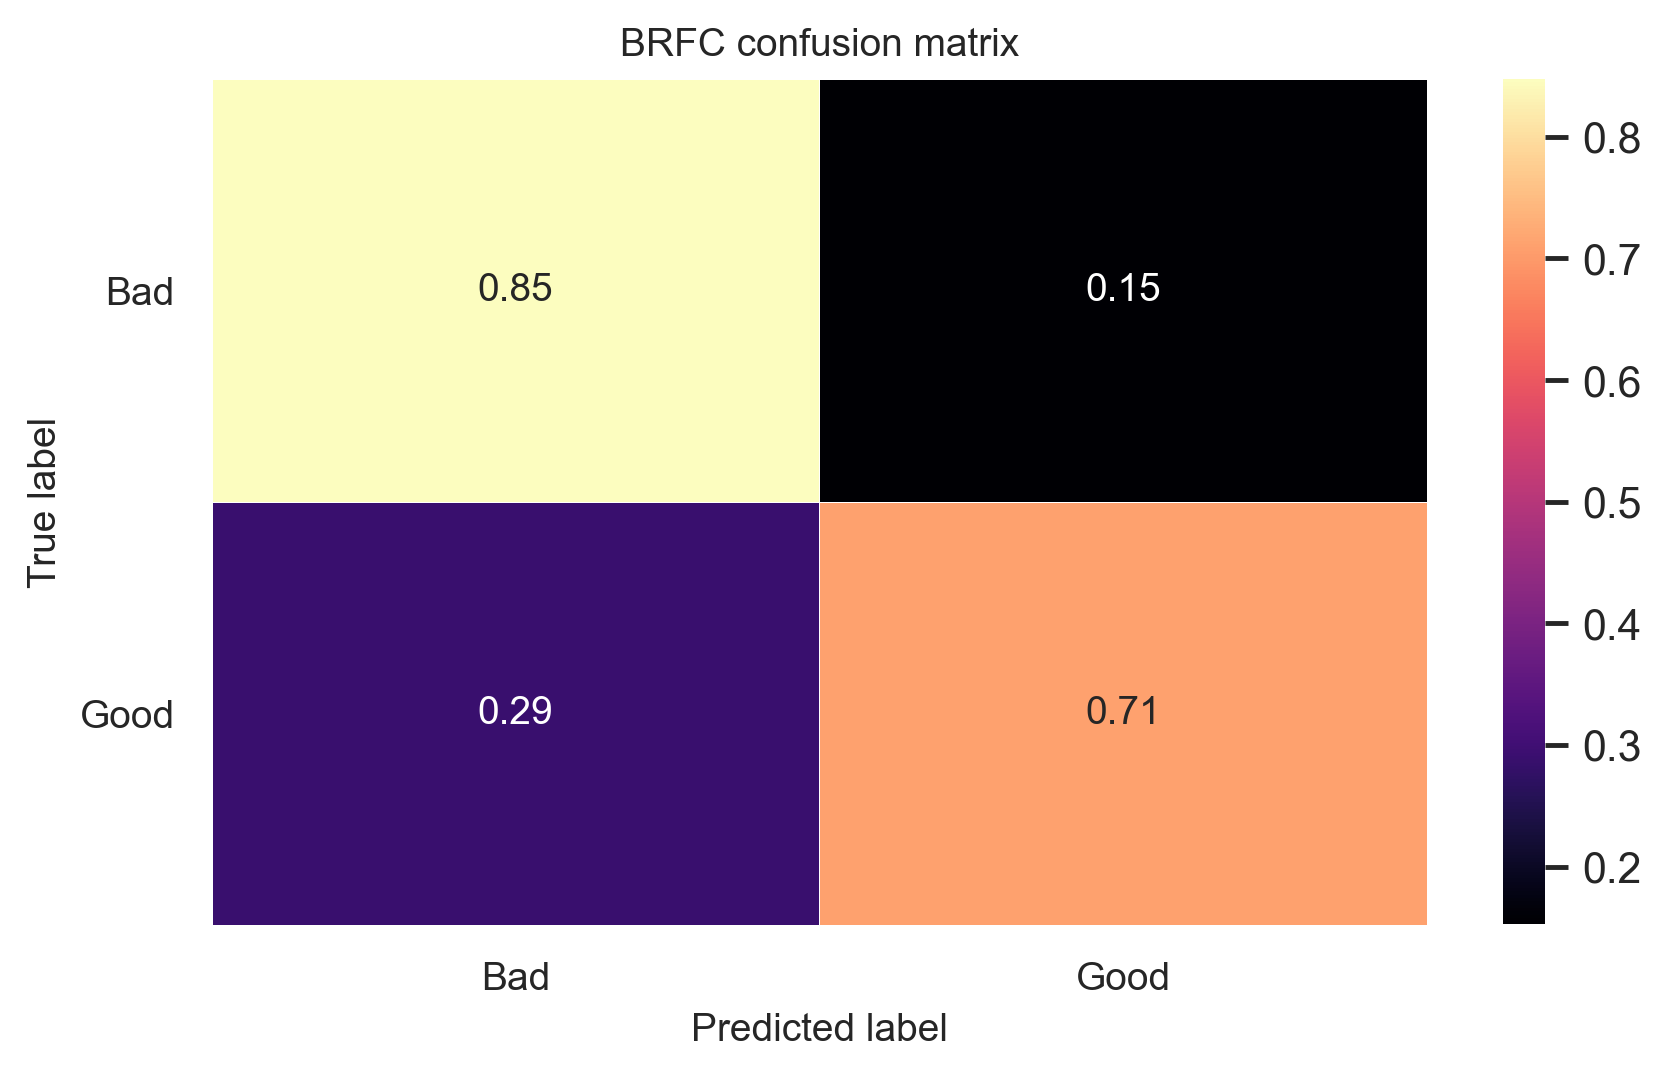

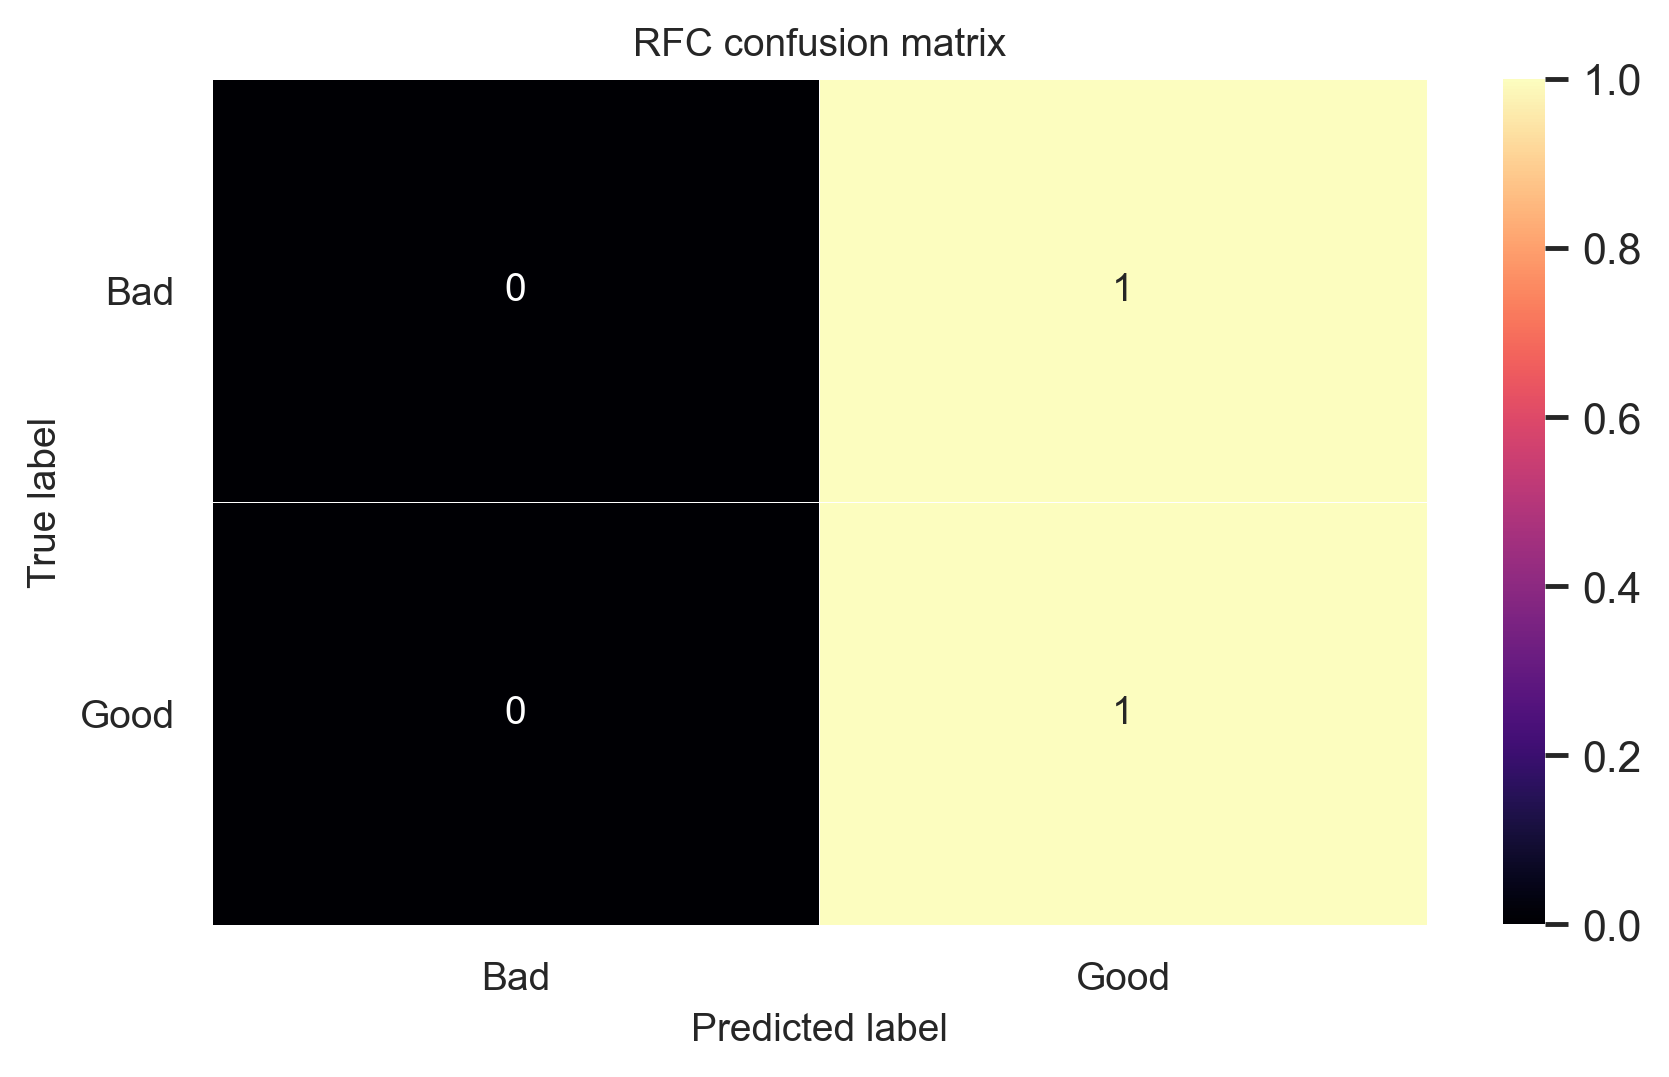

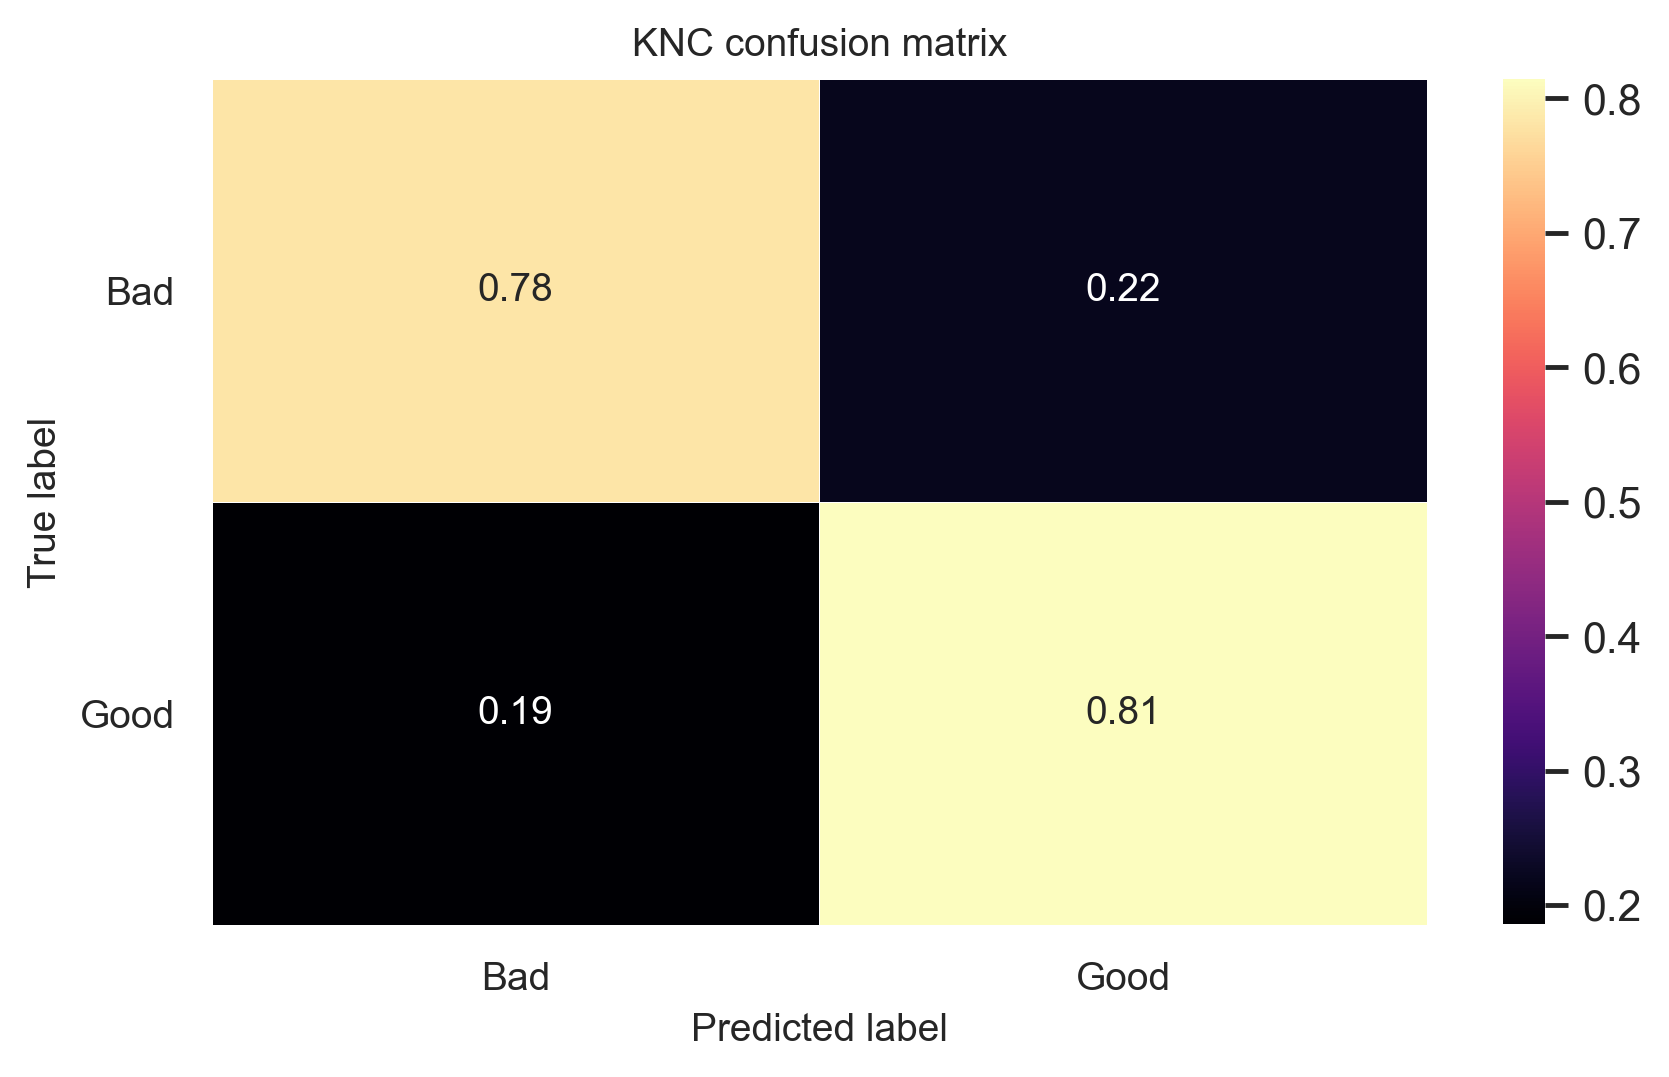

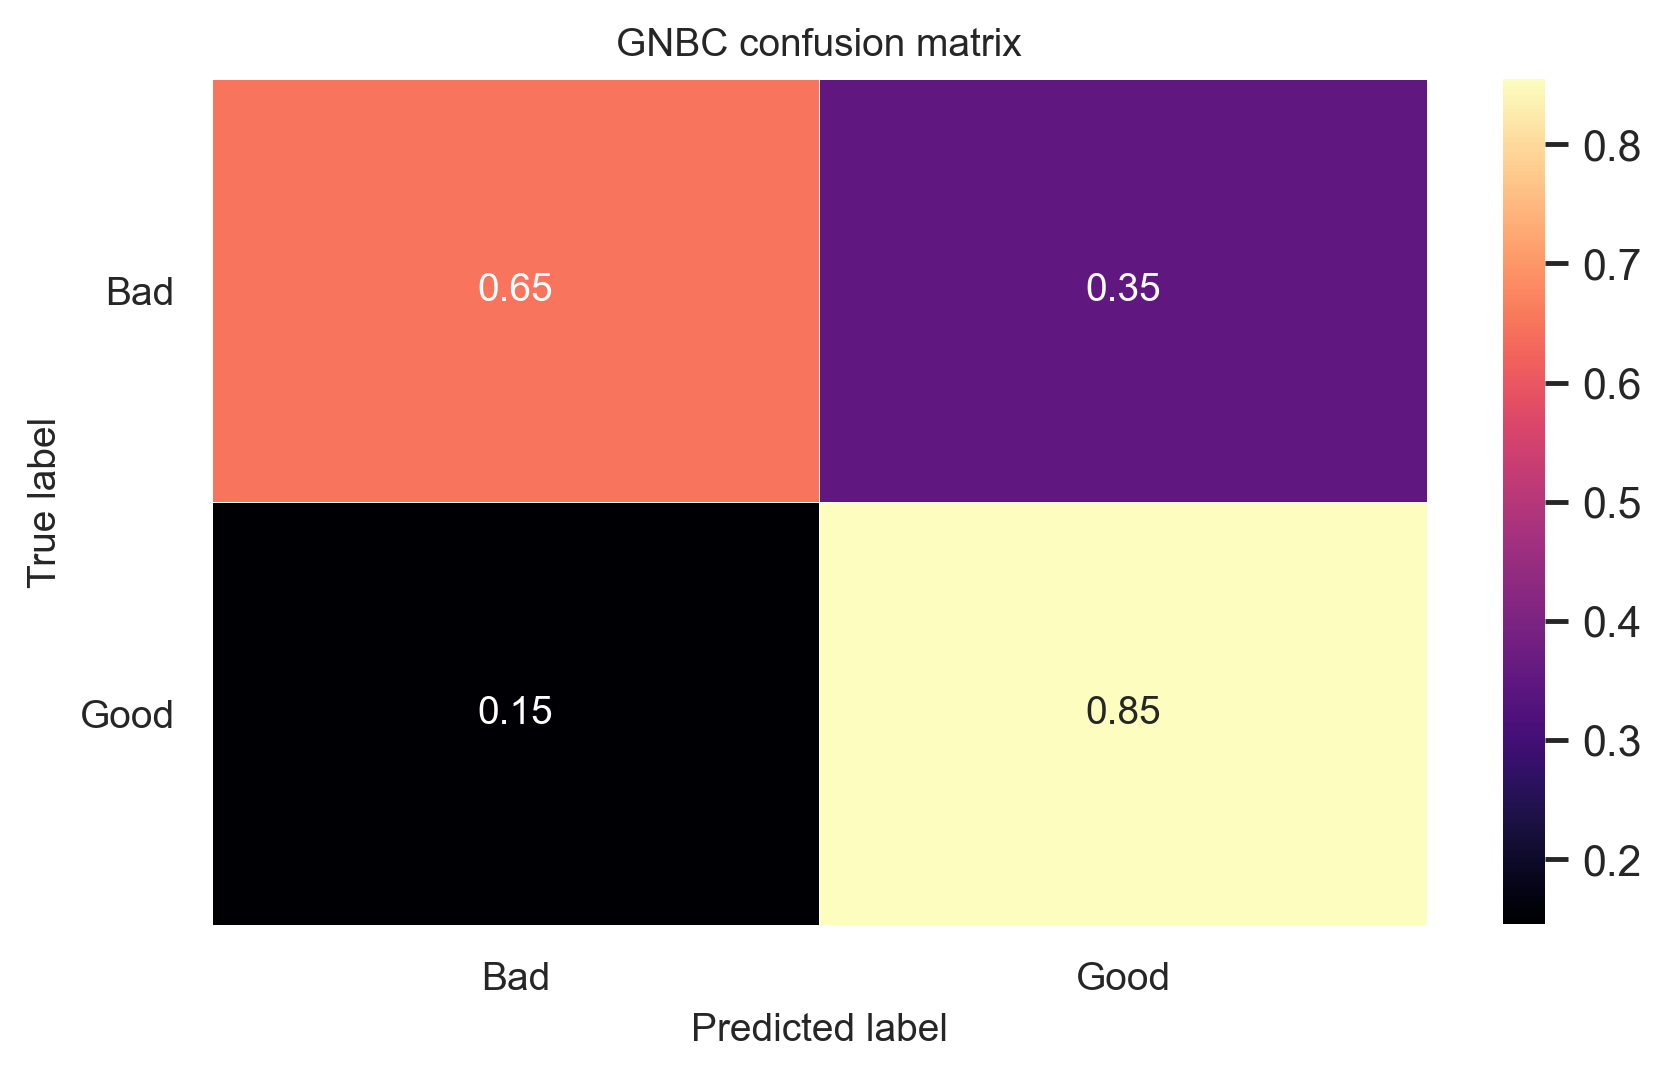

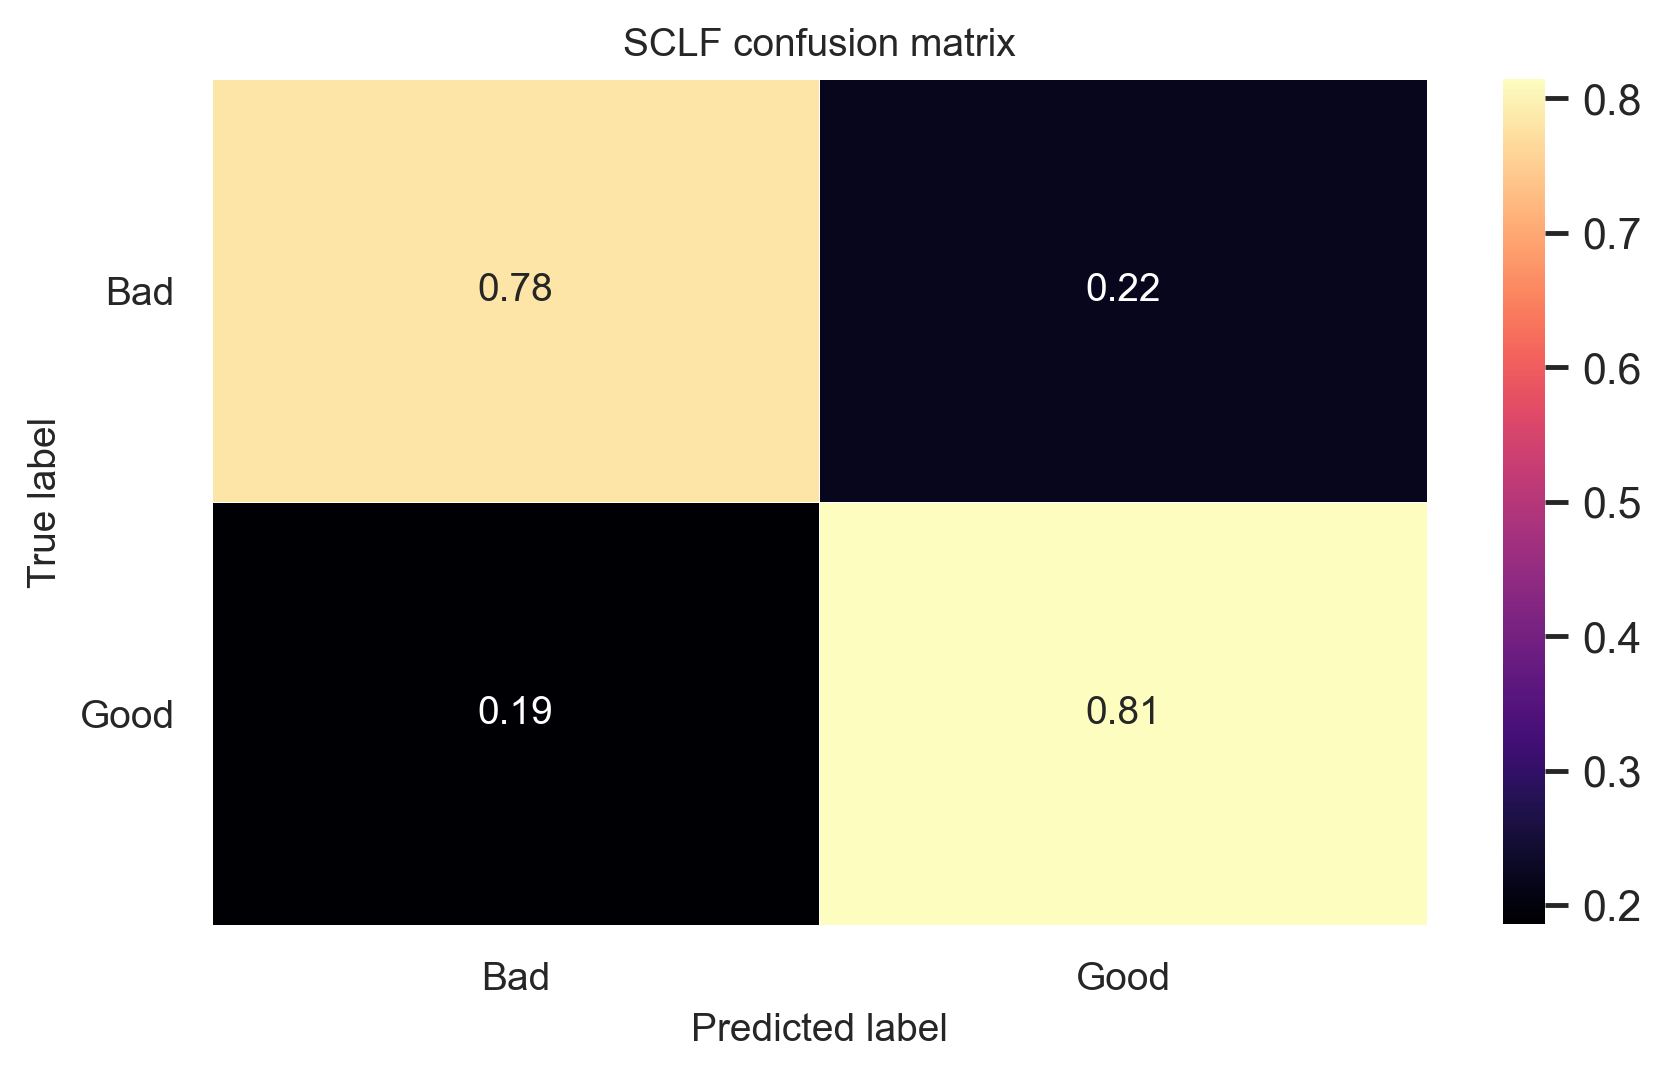

In [40]:
# Get and reshape confusion matrix data
cm = {"BRFC": None, "RFC": None, "KNC": None, "GNBC": None, "SCLF": None}

for key in cm:
    cm[key] = confusion_matrix(Y_test, predictions[key])
    cm[key] = cm[key].astype('float')/cm[key].sum(axis=1)[:, np.newaxis]

def build_cm_plot(matrix, class_names, title):
    # Build the plot
    plt.figure(figsize=(7,4), dpi=280)
    sns.set(font_scale=1.)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.magma, linewidths=0.2)

    tick_marks = np.arange(len(class_names)) + 0.5
    tick_marks2 = tick_marks
    plt.xticks(tick_marks, class_names, rotation=0, size=10)
    plt.yticks(tick_marks2, class_names, rotation=0, size=10)
    plt.xlabel('Predicted label', size=10)
    plt.ylabel('True label', size=10)
    plt.title(title, size=10)
    plt.show()

for key in cm:
    build_cm_plot(cm[key], ['Bad', 'Good'], key+' confusion matrix')

In [41]:
# View the classification report for test data and predictions
for key in predictions:
    print('{} - Classification report:\n'.format(key), classification_report(Y_test, predictions[key]))

BRFC - Classification report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.77       105
           1       0.85      0.71      0.77       124

    accuracy                           0.77       229
   macro avg       0.78      0.78      0.77       229
weighted avg       0.78      0.77      0.77       229

RFC - Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.54      1.00      0.70       124

    accuracy                           0.54       229
   macro avg       0.27      0.50      0.35       229
weighted avg       0.29      0.54      0.38       229

KNC - Classification report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       105
           1       0.81      0.81      0.81       124

    accuracy                           0.80       229
   macro avg       0.80      0.80    

##### Conclusions
As we can see based on the metrics calculated, the best models to use to predict the quality of the wines based on two possible classes are the K-Neighbours classifier and the stacked classifier. The others are less accurate and the random forest classifier seems to fail in predicting the quality.

Also, it is good to note that the bigger accuracy achieved by a classifier when predicting bad wines is provided by the balanced random forest classifier, while its predictions about good wines are not good. This may be due because the proportion of bad wines is ~45% while the rate of good wines over the total of them is ~55% and the balanced random forest classifier could be trying to pay more attention to the bad wines over the good ones because of this difference in rates.

### References
[1] [Decision Tree Algorithm for Multiclass problems using Python](https://towardsdatascience.com/decision-tree-algorithm-for-multiclass-problems-using-python-6b0ec1183bf5)

[2] [10 Techniques to deal with Imbalanced Classes in Machine Learning](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

[3] [Machine Learning Course for Beginners](https://www.youtube.com/watch?v=NWONeJKn6kc&t=13661s&ab_channel=freeCodeCamp.org)

[4] [Multi-Class Imbalanced Classification](https://machinelearningmastery.com/multi-class-imbalanced-classification/)

[5] [Using Random Forest to Learn Imbalanced Data](https://statistics.berkeley.edu/tech-reports/666)

[6] [Evaluating a Random Forest model](https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56)

[7] [Selecting good features – Part III: random forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)

[8] [Stacking Classifiers for Higher Predictive Performance](https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840)